In [3]:
#1. Import 패키지 선언
#<필수패키지 선언>
import pandas as pd
import numpy as np
import seaborn as sns
#<시각화 그래프 이미지 개선 시 사용>a
import matplotlib.pyplot as plt
#<부가패키지 선언>
import folium
import json

In [4]:
#1. 한글폰트 및 이미지처리 패키지 선언
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

# 파일 로드
## 필요한 부분만 사용하시면 됩니다. 
## 로드할 데이터셋 파일 원본/복사본 분리 부분 (공통변수 적용에 따른 규약 적용)
## 필요한 부분만 실행하여 로그할 것 전체 로드 할 경우 메모리 부하 발생될 수도 있음 
## 위 데이터프레임 변수명 참고하세요

## ------------------------분석작업 순서-------------------
## 1단계 데이터셋 구성 파악 할것
##  - 종속/독립 변수의 파악, 데이터행 및 타입, Na컬럼 갯수 파악 : info() , shpae
##  - 데이터 형태 파악 : head(5)
##  - 테이터 분포 파악 : describe() , 시각화 boxplot(), .plot.hist() , (.value_counts(), .plot.bar())
## 2단계 전처리 작업 
##  - Na 컬럼제거 및 대체
##  - 이상치 제거
##  - 1단계 필수 컬럼 생성 : 나이, 동명, 지도시각화 코드
##  - 혈압/비만은 이상치제거 시 해당 내역을 별도 DataFrame으로 만들어 둘것 (분석시 활용하지 않으나, 추후 연계분석 시 중증환자군으로 유의미 부여 필요)
## 3단계 분석 및 시각화 수행 
##  - 통합측정자료(공통) 데이터프레임 생성하여 이용현황 분석 
##  - 각 업무별 데이터셋분석
##  - 병원/질명/이상치 질병건수 등 연계 분석 실시

In [7]:
#2. CVS파일을 로드하여 DataFrame생성 
#2-1-1 신장 체중 등록 내역 파일 로드
base_wh = pd.read_csv('data/세종특별자치시_신장 체중 등록 내역_20231231.csv', encoding='cp949')
df_wh = base_wh.copy()
df_wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   사용자 고유번호  100279 non-null  object 
 1   측정일자      100279 non-null  object 
 2   측정시간      100279 non-null  object 
 3   성별        100279 non-null  object 
 4   사용자 출생년도  100279 non-null  int64  
 5   행정동명      100279 non-null  object 
 6   체중        100279 non-null  float64
 7   신장        99724 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.1+ MB


1단계 데이터셋 구성 파악 할것
- 종속/독립 변수의 파악, 데이터행 및 타입, Na컬럼 갯수 파악 : info() , shpae
- 데이터 형태 파악 : head(5)
- 테이터 분포 파악 : describe() , 시각화 boxplot(), .plot.hist() , (.value_counts(), .plot.bar())¶

In [146]:
df_wh.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   사용자 고유번호  100279 non-null  object 
 1   측정일자      100279 non-null  object 
 2   측정시간      100279 non-null  object 
 3   성별        100279 non-null  object 
 4   사용자 출생년도  100279 non-null  int64  
 5   행정동명      100279 non-null  object 
 6   체중        100279 non-null  float64
 7   신장        99724 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.1+ MB


In [147]:
df_wh.isna().sum()
#==>신장에 결측치 555개 존재

사용자 고유번호      0
측정일자          0
측정시간          0
성별            0
사용자 출생년도      0
행정동명          0
체중            0
신장          555
dtype: int64

In [148]:
df_wh.shape

(100279, 8)

In [149]:
df_wh.head()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,체중,신장
0,CA4C04225E405C30E0535F00A8C03ECD,2021-08-24,18:47,F,1995,다정동,72.5,166.0
1,CA4C255510F09F7CE0535F00A8C009F2,2021-08-24,18:56,F,1971,해밀동,57.3,163.0
2,CA4CD6CDEB87EAF5E0535F00A8C081B0,2021-08-24,19:45,M,1979,새롬동,58.0,166.0
3,CA5E614540CE0769E0535F00A8C08588,2021-08-25,16:41,M,1994,나성동,74.0,170.0
4,CA71A06B1801D4FBE0535F00A8C05802,2021-08-26,15:39,M,1984,반곡동,93.5,187.0


In [150]:
df_wh.describe()

,사용자 출생년도,체중,신장
count,100279.000000,100279.000000,99724.000000
mean,1977.639675,64.313371,165.778913
std,10.548624,11.927514,8.415399
min,1938.000000,10.000000,90.100000
25%,1972.000000,55.700000,160.000000
50%,1978.000000,61.800000,165.100000
75%,1983.000000,71.800000,171.700000
max,2016.000000,500.000000,200.000000


<AxesSubplot:>

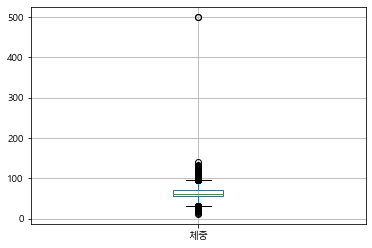

In [151]:
df_wh[['체중']].boxplot()

<AxesSubplot:>

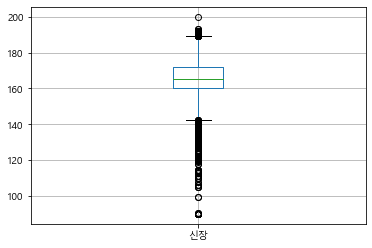

In [152]:
df_wh[['신장']].boxplot()

In [153]:
df_wh.value_counts()

사용자 고유번호                          측정일자        측정시간   성별  사용자 출생년도  행정동명  체중     신장   
E075F80EA2034654E0535F00A8C0200C  2022-06-02  20:08  F   1989      한솔동   63.7   154.6    6
E4B23E46462F1122E0535F00A8C0BC2A  2022-10-23  15:35  F   1966      새롬동   49.2   162.0    4
F7C571BA1DA72C6BE0535F00A8C09333  2023-07-08  08:41  F   2014      반곡동   60.5   130.0    4
EA0506D11FC487D3E0535F00A8C07F74  2023-11-29  10:28  F   1985      새롬동   60.5   169.4    3
D64BC219D0DF2378E0535F00A8C039DB  2022-10-24  20:22  M   2000      한솔동   121.3  180.2    3
                                                                                        ..
E0D4D3E3824E65B5E0535F00A8C09F25  2023-06-10  08:40  F   1978      다정동   48.4   159.3    1
                                              08:37  F   1978      다정동   48.4   159.3    1
                                  2023-06-02  14:39  F   1978      다정동   48.8   158.9    1
                                              14:38  F   1978      다정동   48.9   158.9    1
FFFD

2단계 전처리 작업
- Na 컬럼제거 및 대체
- 이상치 제거
- 1단계 필수 컬럼 생성 : 나이, 동명, 지도시각화 코드
- 혈압/비만은 이상치제거 시 해당 내역을 별도 DataFrame으로 만들어 둘것 (분석시 활용하지 않으나, 추후 연계분석 시 중증환자군으로 유의미 부여 필요)¶

## 2-1) 결측치 제거


In [154]:
df_wh.isna().isna().sum()

사용자 고유번호    0
측정일자        0
측정시간        0
성별          0
사용자 출생년도    0
행정동명        0
체중          0
신장          0
dtype: int64

In [9]:
#결측치 제거
df_wh_nonan=df_wh.dropna(subset=('신장'))
df_wh_nonan.isna().sum()

df_wh.isna().sum()

# 결측치 제거
df_wh_nonan = df_wh.dropna(subset=['신장'])  # '신장' 열에 결측치가 있는 행을 제거

# 결측치 제거 후 다시 확인
df_wh_nonan.isna().sum()

사용자 고유번호    0
측정일자        0
측정시간        0
성별          0
사용자 출생년도    0
행정동명        0
체중          0
신장          0
dtype: int64

In [ ]:
df_wh=df_wh_nonan.copy()

In [ ]:
## 2-2) 300건 이하 동은 제거

In [ ]:
df_wh.value_counts('행정동명')

In [ ]:
#300건 넘은 것만
df_wh_no300=df_wh.groupby('행정동명',as_index=False)\
     .filter(lambda x: len(x) >= 300)
df_wh_no300.value_counts('행정동명')


In [ ]:
df_wh=df_wh_no300.copy()

In [ ]:
df_wh.info()

-이상치 제거


- 1단계 필수 컬럼 생성 : 나이, 동명, 지도시각화 코드


## 2-3 나이 컬럼 생성

In [156]:
df_wh['나이']=2024-df_wh['사용자 출생년도']+1
df_wh=df_wh.copy()
df_wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   사용자 고유번호  100279 non-null  object 
 1   측정일자      100279 non-null  object 
 2   측정시간      100279 non-null  object 
 3   성별        100279 non-null  object 
 4   사용자 출생년도  100279 non-null  int64  
 5   행정동명      100279 non-null  object 
 6   체중        100279 non-null  float64
 7   신장        99724 non-null   float64
 8   나이        100279 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 6.9+ MB


In [157]:
df_wh.head()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,체중,신장,나이
0,CA4C04225E405C30E0535F00A8C03ECD,2021-08-24,18:47,F,1995,다정동,72.5,166.0,30
1,CA4C255510F09F7CE0535F00A8C009F2,2021-08-24,18:56,F,1971,해밀동,57.3,163.0,54
2,CA4CD6CDEB87EAF5E0535F00A8C081B0,2021-08-24,19:45,M,1979,새롬동,58.0,166.0,46
3,CA5E614540CE0769E0535F00A8C08588,2021-08-25,16:41,M,1994,나성동,74.0,170.0,31
4,CA71A06B1801D4FBE0535F00A8C05802,2021-08-26,15:39,M,1984,반곡동,93.5,187.0,41


## 2-4 bmi 컬럼 만들기

<AxesSubplot:ylabel='bmi'>

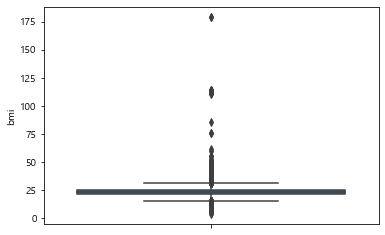

In [158]:

df_wh['bmi']=round(df_wh['체중']/(df_wh['신장']**2)*10000,2)

sns.boxplot(data=df_wh,y='bmi')

## 2-5 bmi 이상치 제거하기


In [159]:

pct25 = df_wh['bmi'].quantile(.25)
pct75 = df_wh['bmi'].quantile(.75)
iqr = pct75 - pct25
a25=pct25 - 1.5 * iqr # 하한
a75=pct75 + 1.5 * iqr # 하한
# 4.5 ~ 40.5 벗어나면 NaN 부여
df_wh['bmi'] = np.where((df_wh['bmi'] < a25) | (df_wh['bmi'] > a75), np.nan, df_wh['bmi'])
# 결측치 빈도 확인
df_wh['bmi'].isna().sum()


3230

In [160]:
#이상치 값 따로 저장하기
# 이상치와 정상치 분리
df_wh_outliers = df_wh[df_wh['bmi'].isna()]
df_wh_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3230 entries, 28 to 100246
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사용자 고유번호  3230 non-null   object 
 1   측정일자      3230 non-null   object 
 2   측정시간      3230 non-null   object 
 3   성별        3230 non-null   object 
 4   사용자 출생년도  3230 non-null   int64  
 5   행정동명      3230 non-null   object 
 6   체중        3230 non-null   float64
 7   신장        2675 non-null   float64
 8   나이        3230 non-null   int64  
 9   bmi       0 non-null      float64
dtypes: float64(3), int64(2), object(5)
memory usage: 277.6+ KB


In [161]:
df_wh_es_test=df_wh.dropna(subset = ['bmi'])
df_wh_es_test.isna().sum()

사용자 고유번호    0
측정일자        0
측정시간        0
성별          0
사용자 출생년도    0
행정동명        0
체중          0
신장          0
나이          0
bmi         0
dtype: int64

<AxesSubplot:ylabel='bmi'>

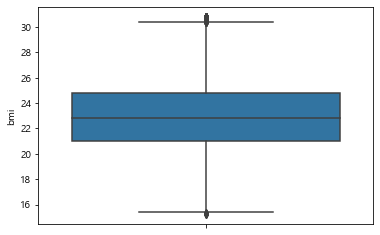

In [162]:
sns.boxplot(data = df_wh_es_test, y = 'bmi')

In [163]:
df_wh_es_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97049 entries, 0 to 100278
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사용자 고유번호  97049 non-null  object 
 1   측정일자      97049 non-null  object 
 2   측정시간      97049 non-null  object 
 3   성별        97049 non-null  object 
 4   사용자 출생년도  97049 non-null  int64  
 5   행정동명      97049 non-null  object 
 6   체중        97049 non-null  float64
 7   신장        97049 non-null  float64
 8   나이        97049 non-null  int64  
 9   bmi       97049 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 8.1+ MB


## 2-6 2020년 이하 데이터 삭제

In [164]:


df_wh_es_test['측정일자'] = pd.to_datetime(df_wh_es_test['측정일자'])
df_wh_es_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97049 entries, 0 to 100278
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   사용자 고유번호  97049 non-null  object        
 1   측정일자      97049 non-null  datetime64[ns]
 2   측정시간      97049 non-null  object        
 3   성별        97049 non-null  object        
 4   사용자 출생년도  97049 non-null  int64         
 5   행정동명      97049 non-null  object        
 6   체중        97049 non-null  float64       
 7   신장        97049 non-null  float64       
 8   나이        97049 non-null  int64         
 9   bmi       97049 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 8.1+ MB


C:\Users\82104\AppData\Local\Temp/ipykernel_11328/2176929005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wh_es_test['측정일자'] = pd.to_datetime(df_wh_es_test['측정일자'])


In [165]:

## 추가 컬럼 년도, 요일 , 분기 등등...
# 측정연도 변수 추가 (년도)
df_wh_es_test['측정연도'] = df_wh_es_test['측정일자'].dt.year

df_wh_es_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97049 entries, 0 to 100278
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   사용자 고유번호  97049 non-null  object        
 1   측정일자      97049 non-null  datetime64[ns]
 2   측정시간      97049 non-null  object        
 3   성별        97049 non-null  object        
 4   사용자 출생년도  97049 non-null  int64         
 5   행정동명      97049 non-null  object        
 6   체중        97049 non-null  float64       
 7   신장        97049 non-null  float64       
 8   나이        97049 non-null  int64         
 9   bmi       97049 non-null  float64       
 10  측정연도      97049 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 8.9+ MB


C:\Users\82104\AppData\Local\Temp/ipykernel_11328/4139616666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wh_es_test['측정연도'] = df_wh_es_test['측정일자'].dt.year


In [166]:
# 측정요일 변수 추가 (요일) : ### 요일값 0:월 1:화.....6:일 입니다.
#base_check['측정요일'] = base_check['측정일자'].dt.weekday
df_wh_es_test['측정요일'] = df_wh_es_test['측정일자'].dt.day_name()
df_wh_es_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97049 entries, 0 to 100278
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   사용자 고유번호  97049 non-null  object        
 1   측정일자      97049 non-null  datetime64[ns]
 2   측정시간      97049 non-null  object        
 3   성별        97049 non-null  object        
 4   사용자 출생년도  97049 non-null  int64         
 5   행정동명      97049 non-null  object        
 6   체중        97049 non-null  float64       
 7   신장        97049 non-null  float64       
 8   나이        97049 non-null  int64         
 9   bmi       97049 non-null  float64       
 10  측정연도      97049 non-null  int64         
 11  측정요일      97049 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 9.6+ MB


C:\Users\82104\AppData\Local\Temp/ipykernel_11328/3276118114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wh_es_test['측정요일'] = df_wh_es_test['측정일자'].dt.day_name()


In [167]:
## 측정요일 갖고 주말(토.일) 평일 구분
df_wh_es_test['휴일구분'] = np.where(df_wh_es_test['측정일자'].dt.weekday>= 5, '주말','평일')
df_wh_es_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97049 entries, 0 to 100278
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   사용자 고유번호  97049 non-null  object        
 1   측정일자      97049 non-null  datetime64[ns]
 2   측정시간      97049 non-null  object        
 3   성별        97049 non-null  object        
 4   사용자 출생년도  97049 non-null  int64         
 5   행정동명      97049 non-null  object        
 6   체중        97049 non-null  float64       
 7   신장        97049 non-null  float64       
 8   나이        97049 non-null  int64         
 9   bmi       97049 non-null  float64       
 10  측정연도      97049 non-null  int64         
 11  측정요일      97049 non-null  object        
 12  휴일구분      97049 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 10.4+ MB


C:\Users\82104\AppData\Local\Temp/ipykernel_11328/3733080826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wh_es_test['휴일구분'] = np.where(df_wh_es_test['측정일자'].dt.weekday>= 5, '주말','평일')


In [168]:

## 나이대역 구분
df_wh_es_test['나이구분'] = (df_wh_es_test['나이']//10)*10

## 측정시간 변수 추가 
df_wh_es_test['방문시간'] = df_wh_es_test['측정시간'].str.split(':').str.get(0)

df_wh_es_test.info()

C:\Users\82104\AppData\Local\Temp/ipykernel_11328/304938369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wh_es_test['나이구분'] = (df_wh_es_test['나이']//10)*10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97049 entries, 0 to 100278
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   사용자 고유번호  97049 non-null  object        
 1   측정일자      97049 non-null  datetime64[ns]
 2   측정시간      97049 non-null  object        
 3   성별        97049 non-null  object        
 4   사용자 출생년도  97049 non-null  int64         
 5   행정동명      97049 non-null  object        
 6   체중        97049 non-null  float64       
 7   신장        97049 non-null  float64       
 8   나이        97049 non-null  int64         
 9   bmi       97049 non-null  float64       
 10  측정연도      97049 non-null  int64         
 11  측정요일      97049 non-null  object        
 12  휴일구분      97049 non-null  object        
 13  나이구분      97049 non-null  int64         
 14  방문시간      97049 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 11.8+ MB


C:\Users\82104\AppData\Local\Temp/ipykernel_11328/304938369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wh_es_test['방문시간'] = df_wh_es_test['측정시간'].str.split(':').str.get(0)


In [169]:
df_wh_es_test.columns

Index(['사용자 고유번호', '측정일자', '측정시간', '성별', '사용자 출생년도', '행정동명', '체중', '신장', '나이',
       'bmi', '측정연도', '측정요일', '휴일구분', '나이구분', '방문시간'],
      dtype='object')

In [170]:

df_wh_es_test.value_counts('측정연도')


측정연도
2023    80607
2022    13775
2021     2468
2020       57
2019       49
2018       27
2013       22
2015       13
2017       13
2016       10
2024        5
2014        3
dtype: int64

In [171]:
df_wh_es_test=df_wh_es_test.query('측정연도 >= 2021')
df_wh_es_test=df_wh_es_test_1.query('측정연도 <  2024')
df_wh_es_test.info()

NameError: name 'df_wh_es_test_1' is not defined

In [ ]:

df_wh_es_test.value_counts('측정연도')


#df_inbody.value_counts('행정동명')

In [ ]:
adf_wh=df_wh_es_test.copy()
adf_wh.info()


# -------------------------------------------- 신장체중 전처리 완료

ㅠ

In [172]:
#2. CVS파일을 로드하여 DataFrame생성 
#2-1-1 신장 체중 등록 내역 파일 로드
base_inbody = pd.read_csv('세종특별자치시_인바디 측정 내역_20231231.csv', encoding='cp949')
df_inbody = base_inbody.copy()
df_inbody.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사용자 고유번호   21120 non-null  object 
 1   측정일자       21120 non-null  object 
 2   측정시간       21120 non-null  object 
 3   성별         21120 non-null  object 
 4   사용자 출생년도   21120 non-null  int64  
 5   행정동명       21120 non-null  object 
 6   체중         21120 non-null  float64
 7   총체수분       21120 non-null  float64
 8   단백질        21120 non-null  float64
 9   무기질        21120 non-null  float64
 10  체지방량       21120 non-null  float64
 11  근육량        21120 non-null  float64
 12  제지방량       21120 non-null  float64
 13  골격근량       21120 non-null  int64  
 14  체질량지수      21120 non-null  float64
 15  체지방률       21120 non-null  int64  
 16  오른팔 근육량    21120 non-null  float64
 17  왼팔 근육량     21120 non-null  float64
 18  몸통 근육량     21120 non-null  float64
 19  오른다리 근육량   21120 non-null  float64
 20  왼다리 근육

1단계 데이터셋 구성 파악 할것
- 종속/독립 변수의 파악, 데이터행 및 타입, Na컬럼 갯수 파악 : info() , shpae
- 데이터 형태 파악 : head(5)
- 테이터 분포 파악 : describe() , 시각화 boxplot(), .plot.hist() , (.value_counts(), .plot.bar())¶

In [173]:
df_inbody.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사용자 고유번호   21120 non-null  object 
 1   측정일자       21120 non-null  object 
 2   측정시간       21120 non-null  object 
 3   성별         21120 non-null  object 
 4   사용자 출생년도   21120 non-null  int64  
 5   행정동명       21120 non-null  object 
 6   체중         21120 non-null  float64
 7   총체수분       21120 non-null  float64
 8   단백질        21120 non-null  float64
 9   무기질        21120 non-null  float64
 10  체지방량       21120 non-null  float64
 11  근육량        21120 non-null  float64
 12  제지방량       21120 non-null  float64
 13  골격근량       21120 non-null  int64  
 14  체질량지수      21120 non-null  float64
 15  체지방률       21120 non-null  int64  
 16  오른팔 근육량    21120 non-null  float64
 17  왼팔 근육량     21120 non-null  float64
 18  몸통 근육량     21120 non-null  float64
 19  오른다리 근육량   21120 non-null  float64
 20  왼다리 근육

In [174]:
df_inbody.isna().sum()
#==>신장에 결측치 555개 존재

사용자 고유번호     0
측정일자         0
측정시간         0
성별           0
사용자 출생년도     0
행정동명         0
체중           0
총체수분         0
단백질          0
무기질          0
체지방량         0
근육량          0
제지방량         0
골격근량         0
체질량지수        0
체지방률         0
오른팔 근육량      0
왼팔 근육량       0
몸통 근육량       0
오른다리 근육량     0
왼다리 근육량      0
오른팔 체지방량     0
왼팔 체지방량      0
몸통 체지방량      0
오른다리 체지방량    0
왼다리 체지방량     0
인바디점수        0
적정체중         0
체중조절         0
지방조절         0
근육조절         0
기초대사량        0
복부지방률        0
내장지방레벨       0
비만도          0
골무기질량        0
복부둘레         0
dtype: int64

In [175]:
df_inbody.shape

(21120, 37)

In [176]:
df_inbody.head()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,체중,총체수분,단백질,무기질,체지방량,근육량,제지방량,골격근량,체질량지수,체지방률,오른팔 근육량,왼팔 근육량,몸통 근육량,오른다리 근육량,왼다리 근육량,오른팔 체지방량,왼팔 체지방량,몸통 체지방량,오른다리 체지방량,왼다리 체지방량,인바디점수,적정체중,체중조절,지방조절,근육조절,기초대사량,복부지방률,내장지방레벨,비만도,골무기질량,복부둘레
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:19,M,1994,나성동,76.2,37.8,10.4,3.7,24.3,48.8,51.9,29,26.8,32,2.57,2.60,22.3,8.6,8.63,1.7,1.6,11.9,4.0,4.0,64,62.5,-13.7,-14.9,1.2,1491,0.85,9,122,3.14,88.2
1,CAD4E5E5AE8D7CACE0535F00A8C075E0,2021-08-31,14:11,F,1983,종촌동,63.7,33.8,9.0,3.4,17.5,43.4,46.2,25,22.7,27,2.22,2.09,19.5,7.6,7.40,1.1,1.2,8.4,2.9,2.9,77,60.1,-3.6,-3.6,0.0,1369,0.82,6,108,2.80,78.7
2,CAD50BA68DA78C38E0535F00A8C01524,2021-08-31,14:20,F,1981,종촌동,41.9,24.3,6.4,2.2,9.0,31.1,32.9,18,17.8,22,1.51,1.46,14.9,5.1,5.04,0.6,0.6,3.8,1.6,1.6,72,49.5,7.6,2.4,5.2,1080,0.82,3,85,1.75,67.9
3,CAD71E638BAC342BE0535F00A8C05272,2021-08-31,16:51,M,1980,한솔동,84.0,47.2,13.7,4.6,18.5,61.7,65.5,39,30.8,22,3.62,3.51,28.4,11.5,11.43,0.9,0.9,9.0,3.3,3.2,88,77.1,-6.9,-6.9,0.0,1785,0.75,3,140,3.82,84.2
4,CAD72451510337B6E0535F00A8C02A56,2021-08-31,17:01,M,1952,한솔동,65.9,44.6,12.7,4.1,4.5,58.0,61.4,36,22.2,7,3.42,3.37,27.4,11.0,10.67,0.1,0.1,1.3,1.1,1.0,86,65.9,0.0,0.0,0.0,1696,0.73,1,101,3.37,69.2


In [177]:
df_inbody.describe()

,사용자 출생년도,체중,총체수분,단백질,무기질,체지방량,근육량,제지방량,골격근량,체질량지수,체지방률,오른팔 근육량,왼팔 근육량,몸통 근육량,오른다리 근육량,왼다리 근육량,오른팔 체지방량,왼팔 체지방량,몸통 체지방량,오른다리 체지방량,왼다리 체지방량,인바디점수,적정체중,체중조절,지방조절,근육조절,기초대사량,복부지방률,내장지방레벨,비만도,골무기질량,복부둘레
count,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000
mean,1977.705871,63.760573,34.562079,9.301922,3.240762,16.659962,44.428883,47.100611,26.112405,23.227557,26.131297,2.437903,2.408337,20.920057,7.495426,7.463611,1.041785,1.061757,8.220857,2.643376,2.626577,74.264347,60.438120,-3.322453,-5.060881,1.738428,1387.378030,0.853518,6.616241,108.541619,2.670810,81.026278
std,11.900715,11.767231,7.177416,1.984948,0.631491,5.894062,9.277133,9.773058,5.994928,3.291103,7.270601,0.730054,0.723376,4.387195,1.610428,1.587099,0.539913,0.540051,3.177963,0.835588,0.828502,5.863139,8.462317,6.481612,5.518837,2.368345,211.105656,0.053756,3.081271,14.777007,0.515537,9.008232
min,1944.000000,17.100000,12.200000,3.200000,-3.000000,0.500000,15.600000,16.400000,8.000000,5.200000,3.000000,0.450000,0.450000,6.700000,2.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,22.600000,-56.000000,-56.000000,0.000000,725.000000,0.320000,1.000000,23.000000,-4.070000,51.700000
25%,1971.000000,55.400000,29.100000,7.700000,2.800000,12.700000,37.300000,39.600000,21.000000,21.100000,21.000000,1.870000,1.840000,17.500000,6.300000,6.280000,0.700000,0.700000,6.100000,2.100000,2.000000,71.000000,54.800000,-6.600000,-7.700000,0.000000,1226.000000,0.820000,5.000000,99.000000,2.310000,74.900000
50%,1978.000000,62.000000,32.600000,8.800000,3.100000,15.800000,41.900000,44.500000,24.000000,22.900000,26.000000,2.230000,2.210000,19.700000,7.200000,7.190000,1.000000,1.000000,7.700000,2.600000,2.500000,74.000000,58.800000,-2.600000,-4.200000,0.500000,1331.000000,0.850000,6.000000,107.000000,2.590000,79.700000
75%,1984.000000,70.825000,39.900000,10.800000,3.600000,19.700000,51.300000,54.300000,31.000000,24.700000,31.000000,3.000000,2.950000,24.200000,8.600000,8.530000,1.300000,1.300000,9.900000,3.100000,3.100000,78.000000,65.500000,0.400000,-1.300000,3.100000,1543.000000,0.880000,8.000000,115.000000,2.970000,85.700000
max,2015.000000,126.900000,71.200000,19.600000,6.400000,66.300000,92.000000,87.900000,57.000000,111.600000,58.000000,5.140000,5.190000,37.300000,15.400000,16.140000,8.600000,8.800000,29.000000,10.700000,10.600000,153.000000,101.900000,55.700000,14.400000,45.300000,2268.000000,1.190000,28.000000,507.000000,5.410000,141.400000


<AxesSubplot:>

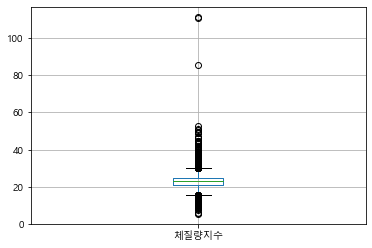

In [178]:
df_inbody[['체질량지수']].boxplot()

<AxesSubplot:ylabel='Frequency'>

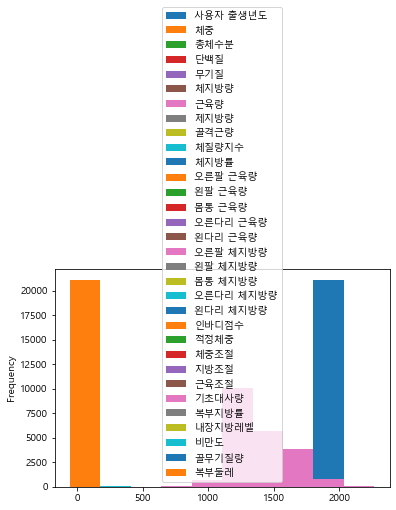

In [179]:
df_inbody.plot.hist()

In [180]:
df_inbody.value_counts()

사용자 고유번호                          측정일자        측정시간   성별  사용자 출생년도  행정동명  체중    총체수분  단백질   무기질  체지방량  근육량   제지방량  골격근량  체질량지수  체지방률  오른팔 근육량  왼팔 근육량  몸통 근육량  오른다리 근육량  왼다리 근육량  오른팔 체지방량  왼팔 체지방량  몸통 체지방량  오른다리 체지방량  왼다리 체지방량  인바디점수  적정체중  체중조절   지방조절   근육조절  기초대사량  복부지방률  내장지방레벨  비만도  골무기질량  복부둘레 
DB1ADB27FA4AAB69E0535F00A8C0490E  2022-08-25  13:03  M   1964      한솔동   75.1  42.4  11.4  3.9  17.4  54.4  57.7  32    24.5   23    3.21     3.10    25.4    9.1       9.23     1.0       1.0      9.1      2.6        2.6       73     67.9  -7.2   -7.2   0.0   1617   0.88   7       111  3.27   87.1     2
E06DC4C2737810F3E0535F00A8C08283  2022-06-02  10:31  F   1995      새롬동   57.1  26.9  7.3   2.5  20.4  34.6  36.7  20    24.8   36    1.93     1.87    17.5    5.6       5.44     1.3       1.3      10.4     3.1        3.1       70     48.3  -8.8   -9.3   0.5   1162   0.89   9       118  2.07   83.3     2
E0D353D215F35FF8E0535F00A8C089F8  2022-07-07  08:55  F   1974      도담동   50.6  27.9  7.5   2.

2단계 전처리 작업
- Na 컬럼제거 및 대체
- 이상치 제거
- 1단계 필수 컬럼 생성 : 나이, 동명, 지도시각화 코드
- 혈압/비만은 이상치제거 시 해당 내역을 별도 DataFrame으로 만들어 둘것 (분석시 활용하지 않으나, 추후 연계분석 시 중증환자군으로 유의미 부여 필요)¶

## 2-1) 결측치 제거--없음


In [181]:
df_inbody.isna().sum()

사용자 고유번호     0
측정일자         0
측정시간         0
성별           0
사용자 출생년도     0
행정동명         0
체중           0
총체수분         0
단백질          0
무기질          0
체지방량         0
근육량          0
제지방량         0
골격근량         0
체질량지수        0
체지방률         0
오른팔 근육량      0
왼팔 근육량       0
몸통 근육량       0
오른다리 근육량     0
왼다리 근육량      0
오른팔 체지방량     0
왼팔 체지방량      0
몸통 체지방량      0
오른다리 체지방량    0
왼다리 체지방량     0
인바디점수        0
적정체중         0
체중조절         0
지방조절         0
근육조절         0
기초대사량        0
복부지방률        0
내장지방레벨       0
비만도          0
골무기질량        0
복부둘레         0
dtype: int64

In [182]:
## 2-2) 300건 이하 동은 제거

In [183]:
df_inbody.value_counts('행정동명')

행정동명
한솔동     3853
새롬동     3776
아름동     2358
다정동     1498
도담동     1496
고운동     1211
반곡동     1210
종촌동      941
해밀동      898
보람동      811
나성동      724
대평동      645
연기면      524
조치원읍     424
소담동      357
어진동      217
장군면       55
전의면       54
연서면       28
부강면       20
금남면       16
연동면        3
전동면        1
dtype: int64

In [184]:
#300건 넘은 것만
df_inbody_no300=df_inbody.groupby('행정동명',as_index=False)\
     .filter(lambda x: len(x) >= 300)
df_inbody_no300.value_counts('행정동명')


행정동명
한솔동     3853
새롬동     3776
아름동     2358
다정동     1498
도담동     1496
고운동     1211
반곡동     1210
종촌동      941
해밀동      898
보람동      811
나성동      724
대평동      645
연기면      524
조치원읍     424
소담동      357
dtype: int64

In [185]:
df_inbody=df_inbody_no300.copy()

In [186]:
df_inbody.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20726 entries, 0 to 21119
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사용자 고유번호   20726 non-null  object 
 1   측정일자       20726 non-null  object 
 2   측정시간       20726 non-null  object 
 3   성별         20726 non-null  object 
 4   사용자 출생년도   20726 non-null  int64  
 5   행정동명       20726 non-null  object 
 6   체중         20726 non-null  float64
 7   총체수분       20726 non-null  float64
 8   단백질        20726 non-null  float64
 9   무기질        20726 non-null  float64
 10  체지방량       20726 non-null  float64
 11  근육량        20726 non-null  float64
 12  제지방량       20726 non-null  float64
 13  골격근량       20726 non-null  int64  
 14  체질량지수      20726 non-null  float64
 15  체지방률       20726 non-null  int64  
 16  오른팔 근육량    20726 non-null  float64
 17  왼팔 근육량     20726 non-null  float64
 18  몸통 근육량     20726 non-null  float64
 19  오른다리 근육량   20726 non-null  float64
 20  왼다리 근육

-이상치 제거


- 1단계 필수 컬럼 생성 : 나이, 동명, 지도시각화 코드


## 2-3 나이 컬럼 생성

In [187]:
df_inbody['나이']=2024-df_inbody['사용자 출생년도']+1
df_inbody=df_inbody.copy()
#.info()

## 2-5 bmi 이상치 제거하기


In [188]:
pct25 = df_inbody['체질량지수'].quantile(.25)
pct75 = df_inbody['체질량지수'].quantile(.75)
iqr = pct75 - pct25
a25=pct25 - 1.5 * iqr # 하한
a75=pct75 + 1.5 * iqr # 하한
# 4.5 ~ 40.5 벗어나면 NaN 부여
df_inbody['체질량지수'] = np.where((df_inbody['체질량지수'] < a25) | (df_inbody['체질량지수'] > a75), np.nan, df_inbody['체질량지수'])
# 결측치 빈도 확인
#df_inbody['체질량지수'].isna().sum()

df_inbody_es_test=df_inbody.dropna(subset = ['체질량지수'])
#df_inbody_es_test.isna().sum()

In [189]:
#이상치 값 따로 저장하기
# 이상치와 정상치 분리
df_inbody_es_outliers = df_inbody[df_inbody['체질량지수'].isna()]

## 2-6 2020년 이하 데이터 삭제


In [190]:
df_inbody.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20726 entries, 0 to 21119
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사용자 고유번호   20726 non-null  object 
 1   측정일자       20726 non-null  object 
 2   측정시간       20726 non-null  object 
 3   성별         20726 non-null  object 
 4   사용자 출생년도   20726 non-null  int64  
 5   행정동명       20726 non-null  object 
 6   체중         20726 non-null  float64
 7   총체수분       20726 non-null  float64
 8   단백질        20726 non-null  float64
 9   무기질        20726 non-null  float64
 10  체지방량       20726 non-null  float64
 11  근육량        20726 non-null  float64
 12  제지방량       20726 non-null  float64
 13  골격근량       20726 non-null  int64  
 14  체질량지수      20145 non-null  float64
 15  체지방률       20726 non-null  int64  
 16  오른팔 근육량    20726 non-null  float64
 17  왼팔 근육량     20726 non-null  float64
 18  몸통 근육량     20726 non-null  float64
 19  오른다리 근육량   20726 non-null  float64
 20  왼다리 근육

In [191]:
df_inbody['측정일자'] = pd.to_datetime(df_inbody['측정일자'])
df_inbody.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20726 entries, 0 to 21119
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사용자 고유번호   20726 non-null  object        
 1   측정일자       20726 non-null  datetime64[ns]
 2   측정시간       20726 non-null  object        
 3   성별         20726 non-null  object        
 4   사용자 출생년도   20726 non-null  int64         
 5   행정동명       20726 non-null  object        
 6   체중         20726 non-null  float64       
 7   총체수분       20726 non-null  float64       
 8   단백질        20726 non-null  float64       
 9   무기질        20726 non-null  float64       
 10  체지방량       20726 non-null  float64       
 11  근육량        20726 non-null  float64       
 12  제지방량       20726 non-null  float64       
 13  골격근량       20726 non-null  int64         
 14  체질량지수      20145 non-null  float64       
 15  체지방률       20726 non-null  int64         
 16  오른팔 근육량    20726 non-null  float64      

In [192]:
## 추가 컬럼 년도, 요일 , 분기 등등...
# 측정연도 변수 추가 (년도)
df_inbody['측정연도'] = df_inbody['측정일자'].dt.year
# 측정요일 변수 추가 (요일) : ### 요일값 0:월 1:화.....6:일 입니다.
#base_check['측정요일'] = base_check['측정일자'].dt.weekday
df_inbody['측정요일'] = df_inbody['측정일자'].dt.day_name()

## 측정요일 갖고 주말(토.일) 평일 구분
df_inbody['휴일구분'] = np.where(df_inbody['측정일자'].dt.weekday>= 5, '주말','평일')

## 나이대역 구분
df_inbody['나이구분'] = (df_inbody['나이']//10)*10

## 측정시간 변수 추가 
df_inbody['방문시간'] = df_inbody['측정시간'].str.split(':').str.get(0)


df_inbody.info()
df_inbody_es_test=df_inbody.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20726 entries, 0 to 21119
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사용자 고유번호   20726 non-null  object        
 1   측정일자       20726 non-null  datetime64[ns]
 2   측정시간       20726 non-null  object        
 3   성별         20726 non-null  object        
 4   사용자 출생년도   20726 non-null  int64         
 5   행정동명       20726 non-null  object        
 6   체중         20726 non-null  float64       
 7   총체수분       20726 non-null  float64       
 8   단백질        20726 non-null  float64       
 9   무기질        20726 non-null  float64       
 10  체지방량       20726 non-null  float64       
 11  근육량        20726 non-null  float64       
 12  제지방량       20726 non-null  float64       
 13  골격근량       20726 non-null  int64         
 14  체질량지수      20145 non-null  float64       
 15  체지방률       20726 non-null  int64         
 16  오른팔 근육량    20726 non-null  float64      

<AxesSubplot:ylabel='체질량지수'>

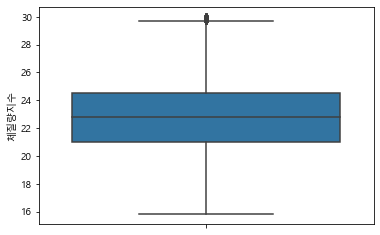

In [193]:
sns.boxplot(data = df_inbody_es_test, y = '체질량지수')

In [194]:
df_inbody_es_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20726 entries, 0 to 21119
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사용자 고유번호   20726 non-null  object        
 1   측정일자       20726 non-null  datetime64[ns]
 2   측정시간       20726 non-null  object        
 3   성별         20726 non-null  object        
 4   사용자 출생년도   20726 non-null  int64         
 5   행정동명       20726 non-null  object        
 6   체중         20726 non-null  float64       
 7   총체수분       20726 non-null  float64       
 8   단백질        20726 non-null  float64       
 9   무기질        20726 non-null  float64       
 10  체지방량       20726 non-null  float64       
 11  근육량        20726 non-null  float64       
 12  제지방량       20726 non-null  float64       
 13  골격근량       20726 non-null  int64         
 14  체질량지수      20145 non-null  float64       
 15  체지방률       20726 non-null  int64         
 16  오른팔 근육량    20726 non-null  float64      

In [195]:
adf_inbody_es=df_inbody_es_test.copy()

In [196]:
adf_inbody_es.head()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,체중,총체수분,단백질,무기질,체지방량,근육량,제지방량,골격근량,체질량지수,체지방률,오른팔 근육량,왼팔 근육량,몸통 근육량,오른다리 근육량,왼다리 근육량,오른팔 체지방량,왼팔 체지방량,몸통 체지방량,오른다리 체지방량,왼다리 체지방량,인바디점수,적정체중,체중조절,지방조절,근육조절,기초대사량,복부지방률,내장지방레벨,비만도,골무기질량,복부둘레,나이,측정연도,측정요일,휴일구분,나이구분,방문시간
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:19,M,1994,나성동,76.2,37.8,10.4,3.7,24.3,48.8,51.9,29,26.8,32,2.57,2.60,22.3,8.6,8.63,1.7,1.6,11.9,4.0,4.0,64,62.5,-13.7,-14.9,1.2,1491,0.85,9,122,3.14,88.2,31,2021,Monday,평일,30,14
1,CAD4E5E5AE8D7CACE0535F00A8C075E0,2021-08-31,14:11,F,1983,종촌동,63.7,33.8,9.0,3.4,17.5,43.4,46.2,25,22.7,27,2.22,2.09,19.5,7.6,7.40,1.1,1.2,8.4,2.9,2.9,77,60.1,-3.6,-3.6,0.0,1369,0.82,6,108,2.80,78.7,42,2021,Tuesday,평일,40,14
2,CAD50BA68DA78C38E0535F00A8C01524,2021-08-31,14:20,F,1981,종촌동,41.9,24.3,6.4,2.2,9.0,31.1,32.9,18,17.8,22,1.51,1.46,14.9,5.1,5.04,0.6,0.6,3.8,1.6,1.6,72,49.5,7.6,2.4,5.2,1080,0.82,3,85,1.75,67.9,44,2021,Tuesday,평일,40,14
3,CAD71E638BAC342BE0535F00A8C05272,2021-08-31,16:51,M,1980,한솔동,84.0,47.2,13.7,4.6,18.5,61.7,65.5,39,NaN,22,3.62,3.51,28.4,11.5,11.43,0.9,0.9,9.0,3.3,3.2,88,77.1,-6.9,-6.9,0.0,1785,0.75,3,140,3.82,84.2,45,2021,Tuesday,평일,40,16
4,CAD72451510337B6E0535F00A8C02A56,2021-08-31,17:01,M,1952,한솔동,65.9,44.6,12.7,4.1,4.5,58.0,61.4,36,22.2,7,3.42,3.37,27.4,11.0,10.67,0.1,0.1,1.3,1.1,1.0,86,65.9,0.0,0.0,0.0,1696,0.73,1,101,3.37,69.2,73,2021,Tuesday,평일,70,17


# ------------------------인바디 전처리 완료

In [197]:
pd.set_option('display.max_columns', None)

In [198]:
adf_inbody_es.head()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,체중,총체수분,단백질,무기질,체지방량,근육량,제지방량,골격근량,체질량지수,체지방률,오른팔 근육량,왼팔 근육량,몸통 근육량,오른다리 근육량,왼다리 근육량,오른팔 체지방량,왼팔 체지방량,몸통 체지방량,오른다리 체지방량,왼다리 체지방량,인바디점수,적정체중,체중조절,지방조절,근육조절,기초대사량,복부지방률,내장지방레벨,비만도,골무기질량,복부둘레,나이,측정연도,측정요일,휴일구분,나이구분,방문시간
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:19,M,1994,나성동,76.2,37.8,10.4,3.7,24.3,48.8,51.9,29,26.8,32,2.57,2.60,22.3,8.6,8.63,1.7,1.6,11.9,4.0,4.0,64,62.5,-13.7,-14.9,1.2,1491,0.85,9,122,3.14,88.2,31,2021,Monday,평일,30,14
1,CAD4E5E5AE8D7CACE0535F00A8C075E0,2021-08-31,14:11,F,1983,종촌동,63.7,33.8,9.0,3.4,17.5,43.4,46.2,25,22.7,27,2.22,2.09,19.5,7.6,7.40,1.1,1.2,8.4,2.9,2.9,77,60.1,-3.6,-3.6,0.0,1369,0.82,6,108,2.80,78.7,42,2021,Tuesday,평일,40,14
2,CAD50BA68DA78C38E0535F00A8C01524,2021-08-31,14:20,F,1981,종촌동,41.9,24.3,6.4,2.2,9.0,31.1,32.9,18,17.8,22,1.51,1.46,14.9,5.1,5.04,0.6,0.6,3.8,1.6,1.6,72,49.5,7.6,2.4,5.2,1080,0.82,3,85,1.75,67.9,44,2021,Tuesday,평일,40,14
3,CAD71E638BAC342BE0535F00A8C05272,2021-08-31,16:51,M,1980,한솔동,84.0,47.2,13.7,4.6,18.5,61.7,65.5,39,NaN,22,3.62,3.51,28.4,11.5,11.43,0.9,0.9,9.0,3.3,3.2,88,77.1,-6.9,-6.9,0.0,1785,0.75,3,140,3.82,84.2,45,2021,Tuesday,평일,40,16
4,CAD72451510337B6E0535F00A8C02A56,2021-08-31,17:01,M,1952,한솔동,65.9,44.6,12.7,4.1,4.5,58.0,61.4,36,22.2,7,3.42,3.37,27.4,11.0,10.67,0.1,0.1,1.3,1.1,1.0,86,65.9,0.0,0.0,0.0,1696,0.73,1,101,3.37,69.2,73,2021,Tuesday,평일,70,17


In [199]:
adf_wh.head()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,체중,신장,나이,bmi,측정연도,측정요일,휴일구분,나이구분,방문시간
0,CA4C04225E405C30E0535F00A8C03ECD,2021-08-24,18:47,F,1995,다정동,72.5,166.0,30,26.31,2021,Tuesday,평일,30,18
1,CA4C255510F09F7CE0535F00A8C009F2,2021-08-24,18:56,F,1971,해밀동,57.3,163.0,54,21.57,2021,Tuesday,평일,50,18
2,CA4CD6CDEB87EAF5E0535F00A8C081B0,2021-08-24,19:45,M,1979,새롬동,58.0,166.0,46,21.05,2021,Tuesday,평일,40,19
3,CA5E614540CE0769E0535F00A8C08588,2021-08-25,16:41,M,1994,나성동,74.0,170.0,31,25.61,2021,Wednesday,평일,30,16
4,CA71A06B1801D4FBE0535F00A8C05802,2021-08-26,15:39,M,1984,반곡동,93.5,187.0,41,26.74,2021,Thursday,평일,40,15


In [200]:
#성별 이용
adf_wh_es_sex=adf_wh.value_counts('성별')

adf_wh_es_sex

성별
F    57059
M    39219
dtype: int64

<AxesSubplot:xlabel='성별', ylabel='count'>

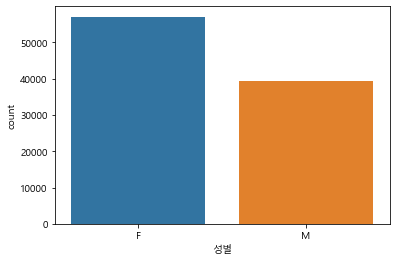

In [201]:

sns.countplot(data=adf_wh,x='성별')

In [202]:
#동별 이용
adf_wh.value_counts('행정동명')

행정동명
새롬동     13075
한솔동     12205
아름동      9929
다정동      9172
고운동      7509
도담동      7185
소담동      5666
반곡동      4943
종촌동      4785
보람동      4561
나성동      4317
조치원읍     3980
대평동      3257
해밀동      3055
어진동      1137
연기면      1113
전의면       389
dtype: int64

<AxesSubplot:xlabel='count', ylabel='행정동명'>

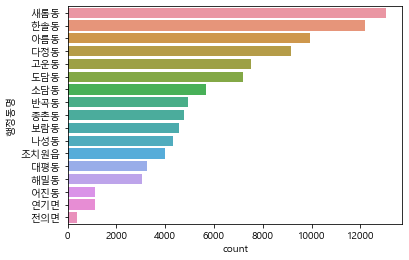

In [203]:
sns.countplot(data=adf_wh,y='행정동명',order = adf_wh['행정동명'].value_counts().index)

## 동별 , bmi지수 평균_신장,체중

In [204]:

'''       .agg(n=('bmi','mean'))\
sns.barplot(data=adf_wh_es_mean,x='n')
adf_wh_es_mean=adf_wh.groupby('행정동명')\
'''

adf_wh_es_mean = adf_wh.groupby('행정동명', as_index=False)\
    .agg(bmi_mean=('bmi', 'mean'))\
    .sort_values(by='bmi_mean', ascending=False)
'''
df.sort_values(by = 'A', ascending = False)
'''
# barplot 그리기
#sns.barplot(data=adf_wh_es_mean, x='행정동명', y='bmi_mean')

"\ndf.sort_values(by = 'A', ascending = False)\n"

In [205]:
adf_wh_es_mean

,행정동명,bmi_mean
3,대평동,24.761397
11,연기면,23.620898
8,소담동,23.601235
16,해밀동,23.552213
1,나성동,23.532625
6,보람동,23.507062
13,조치원읍,23.347063
14,종촌동,23.047329
5,반곡동,22.987528
15,한솔동,22.975111


<AxesSubplot:xlabel='행정동명', ylabel='bmi_mean'>

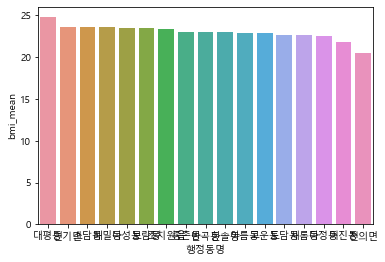

In [206]:
# barplot 그리기
sns.barplot(data=adf_wh_es_mean, x='행정동명', y='bmi_mean')

<AxesSubplot:xlabel='bmi_mean', ylabel='행정동명'>

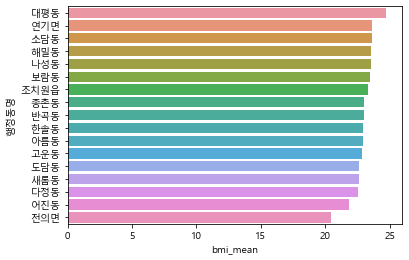

In [207]:
# barplot 그리기
sns.barplot(data=adf_wh_es_mean, y='행정동명',x='bmi_mean')

In [208]:
adf_wh_es_fat=adf_wh.copy()
adf_wh_es_fat['fat']=np.where(adf_wh_es_fat['bmi']<=18.5,'저체중',
                    np.where(adf_wh_es_fat['bmi']<=22.9,'보통',
                    np.where(adf_wh_es_fat['bmi']<=24.9,'과체중',
                    np.where(adf_wh_es_fat['bmi']<=29.9,'1단계비만',
                    np.where(adf_wh_es_fat['bmi']<=34.9,'2단계비만','3단계비만')))))

In [209]:
#비만 유형벌 count
adf_wh_es_fat[['행정동명','fat']].value_counts('fat')



fat
보통       45786
과체중      24547
1단계비만    21622
저체중       3383
2단계비만      940
dtype: int64

## 동별 비만인 사람 수_신장체중


In [210]:
adf_wh_es_fat

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,체중,신장,나이,bmi,측정연도,측정요일,휴일구분,나이구분,방문시간,fat
0,CA4C04225E405C30E0535F00A8C03ECD,2021-08-24,18:47,F,1995,다정동,72.5,166.0,30,26.31,2021,Tuesday,평일,30,18,1단계비만
1,CA4C255510F09F7CE0535F00A8C009F2,2021-08-24,18:56,F,1971,해밀동,57.3,163.0,54,21.57,2021,Tuesday,평일,50,18,보통
2,CA4CD6CDEB87EAF5E0535F00A8C081B0,2021-08-24,19:45,M,1979,새롬동,58.0,166.0,46,21.05,2021,Tuesday,평일,40,19,보통
3,CA5E614540CE0769E0535F00A8C08588,2021-08-25,16:41,M,1994,나성동,74.0,170.0,31,25.61,2021,Wednesday,평일,30,16,1단계비만
4,CA71A06B1801D4FBE0535F00A8C05802,2021-08-26,15:39,M,1984,반곡동,93.5,187.0,41,26.74,2021,Thursday,평일,40,15,1단계비만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100274,EC8718D1FDF61A25E0535F00A8C0DBFB,2023-12-31,23:46,F,1981,소담동,54.8,164.0,44,20.37,2023,Sunday,주말,40,23,보통
100275,ED2C36A4C579AADFE0535F00A8C071AE,2023-12-31,23:49,F,1976,새롬동,58.5,158.0,49,23.43,2023,Sunday,주말,40,23,과체중
100276,EC60BDA0AB32BDE8E0535F00A8C0CB28,2023-12-31,23:50,F,1982,소담동,61.5,149.8,43,27.41,2023,Sunday,주말,40,23,1단계비만
100277,ED47D5D202D28AB6E0535F00A8C0CE6C,2023-12-31,23:52,M,1974,새롬동,75.9,175.0,51,24.78,2023,Sunday,주말,50,23,과체중


In [211]:
#동별 비만인 사람 수_신장체중
adf_wh_fat_cnt = adf_wh_es_fat[adf_wh_es_fat['fat'].isin(['1단계비만', '2단계비만', '3단계비만'])]\
    .groupby('행정동명', as_index=False)\
    .size()\
    .sort_values('size',ascending=False)
adf_wh_fat_cnt

,행정동명,size
15,한솔동,2766
2,다정동,2346
7,새롬동,2110
8,소담동,2085
0,고운동,1912
9,아름동,1863
13,조치원읍,1325
3,대평동,1293
4,도담동,1274
1,나성동,1187


In [212]:
adf_wh_fat_cnt.to_csv('wh_cnt.csv',index=False)

<AxesSubplot:xlabel='size', ylabel='행정동명'>

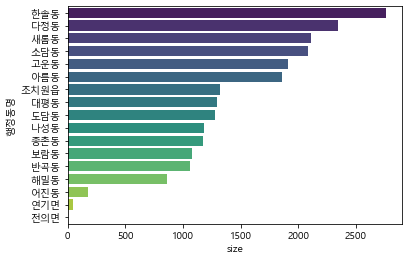

In [213]:
sns.barplot(y='행정동명', x='size', data=adf_wh_fat_cnt, palette='viridis')



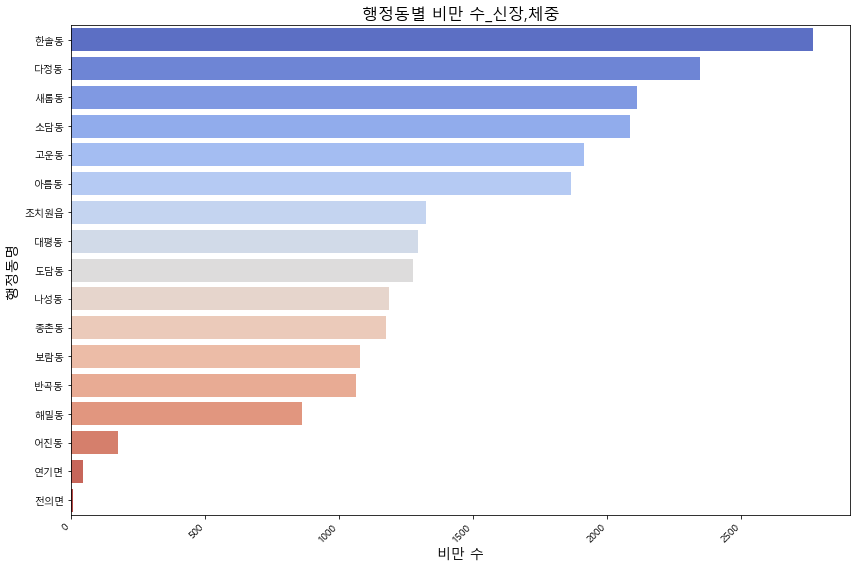

In [214]:
plt.figure(figsize=(12, 8))
sns.barplot(y='행정동명',x='size', data=adf_wh_fat_cnt, palette='coolwarm')
# 그래프 제목 및 축 레이블 설정
plt.title('행정동별 비만 수_신장,체중', fontsize=16)
plt.xlabel('비만 수', fontsize=14)
plt.ylabel('행정동명', fontsize=14)

# x축 레이블 회전 (가독성 향상)
plt.xticks(rotation=45, ha='right')

# 그래프 출력
plt.tight_layout()
plt.show()

## 행정동별 비만 비율

<AxesSubplot:xlabel='obesity_rate', ylabel='행정동명'>

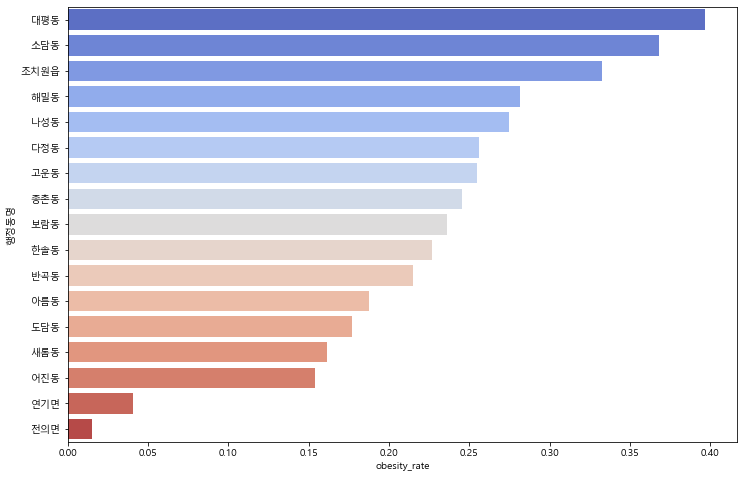

In [215]:

# 행정동별 전체 인구 수 계산
adf_wh_es_pop = adf_wh_es_fat.groupby('행정동명', as_index=False).size()

# 비만 비율 계산 (비만인 사람 수 / 전체 인구 수)
adf_wh_fat_cnt['obesity_rate'] = adf_wh_fat_cnt['size'] / adf_wh_es_pop['size']
adf_wh_fat_cnt= adf_wh_fat_cnt.sort_values(by='obesity_rate', ascending=False)

# 행정동명을 기준으로 비만 비율을 barplot으로 그리기
plt.figure(figsize=(12, 8))
sns.barplot(y='행정동명',x='obesity_rate', data=adf_wh_fat_cnt, palette='coolwarm')


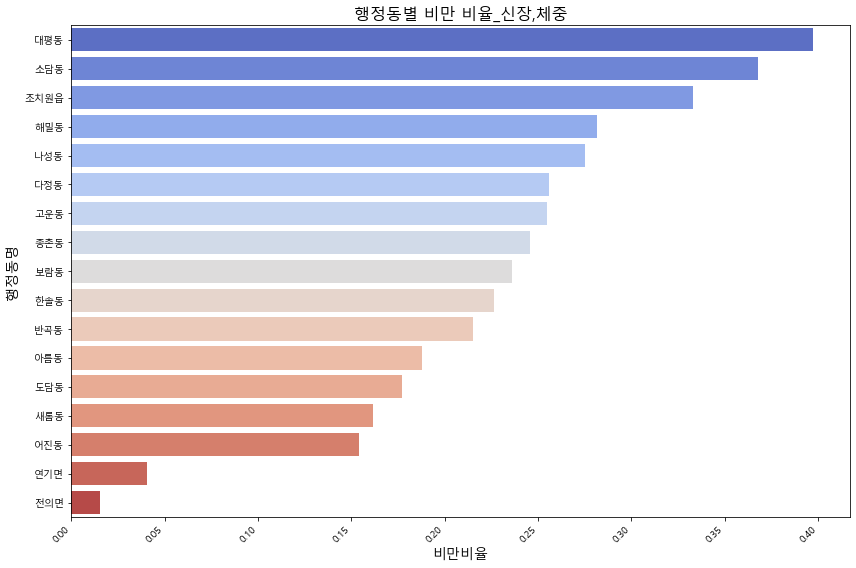

In [216]:
plt.figure(figsize=(12, 8))
sns.barplot(y='행정동명',x='obesity_rate', data=adf_wh_fat_cnt, palette='coolwarm')

# 그래프 제목 및 축 레이블 설정
plt.title('행정동별 비만 비율_신장,체중', fontsize=16)
plt.xlabel('비만비율', fontsize=14)
plt.ylabel('행정동명', fontsize=14)


# x축 레이블 회전 (가독성 향상)
plt.xticks(rotation=45, ha='right')

# 그래프 출력
plt.tight_layout()
plt.show()

## 동별 비만유형 구성비율


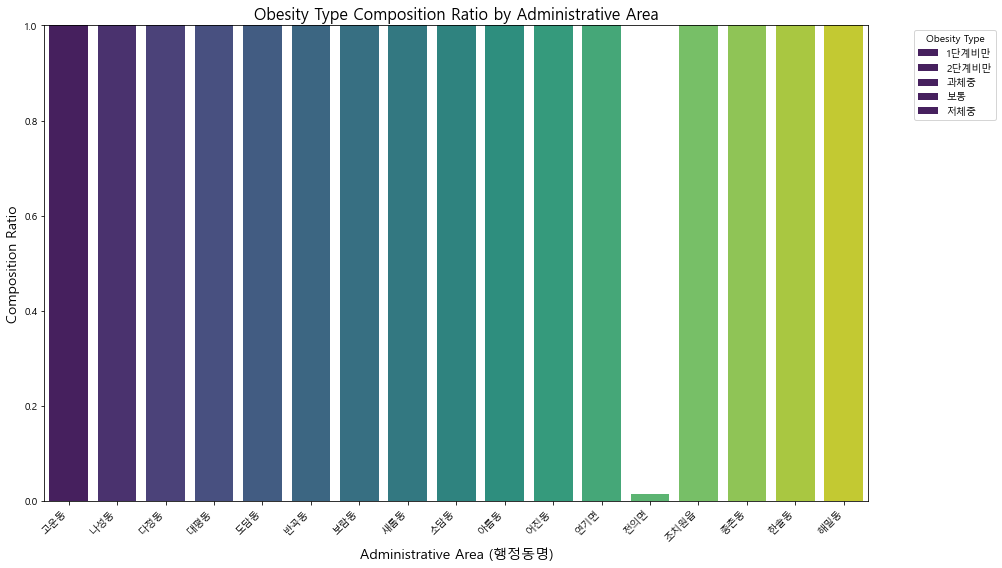

In [217]:

# 비만 유형별로 행정동별 구성 비율 계산
adf_wh_es_fat_per = adf_wh_es_fat.groupby(['행정동명', 'fat'])\
    .size()\
    .groupby(level=0)\
    .apply(lambda x: x / x.sum())\
    .reset_index(name='ratio')

# 행정동명과 비만 유형을 기준으로 데이터를 정렬
adf_wh_es_fat_per = adf_wh_es_fat_per.sort_values(by=['행정동명', 'fat'])

# 시각화를 위해 데이터 정렬
order = adf_wh_es_fat_per['행정동명'].unique()
hue_order = adf_wh_es_fat_per['fat'].unique()

# Stacked barplot 그리기
plt.figure(figsize=(14, 8))
bottoms = pd.Series(0, index=order)

# 각 비만 유형에 대해 막대를 쌓아가며 그리기
for fat_type in hue_order:
    sns.barplot(
        x='행정동명', 
        y='ratio', 
        data=adf_wh_es_fat_per[adf_wh_es_fat_per['fat'] == fat_type], 
        order=order, 
        label=fat_type, 
        bottom=bottoms,
        palette='viridis'
    )
    # 기존 막대의 높이를 추가하여 다음 유형의 막대를 쌓을 수 있도록 업데이트
    bottoms += adf_wh_es_fat_per[adf_wh_es_fat_per['fat'] == fat_type].set_index('행정동명')['ratio']

# 그래프 제목 및 축 레이블 설정
plt.title('Obesity Type Composition Ratio by Administrative Area', fontsize=16)
plt.xlabel('Administrative Area (행정동명)', fontsize=14)
plt.ylabel('Composition Ratio', fontsize=14)
plt.xticks(rotation=45, ha='right')

# 범례 설정
plt.legend(title='Obesity Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()

C:\Users\82104\AppData\Local\Temp/ipykernel_11328/1606954658.py:21: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(data['ratio'], labels=data['fat'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(data)))


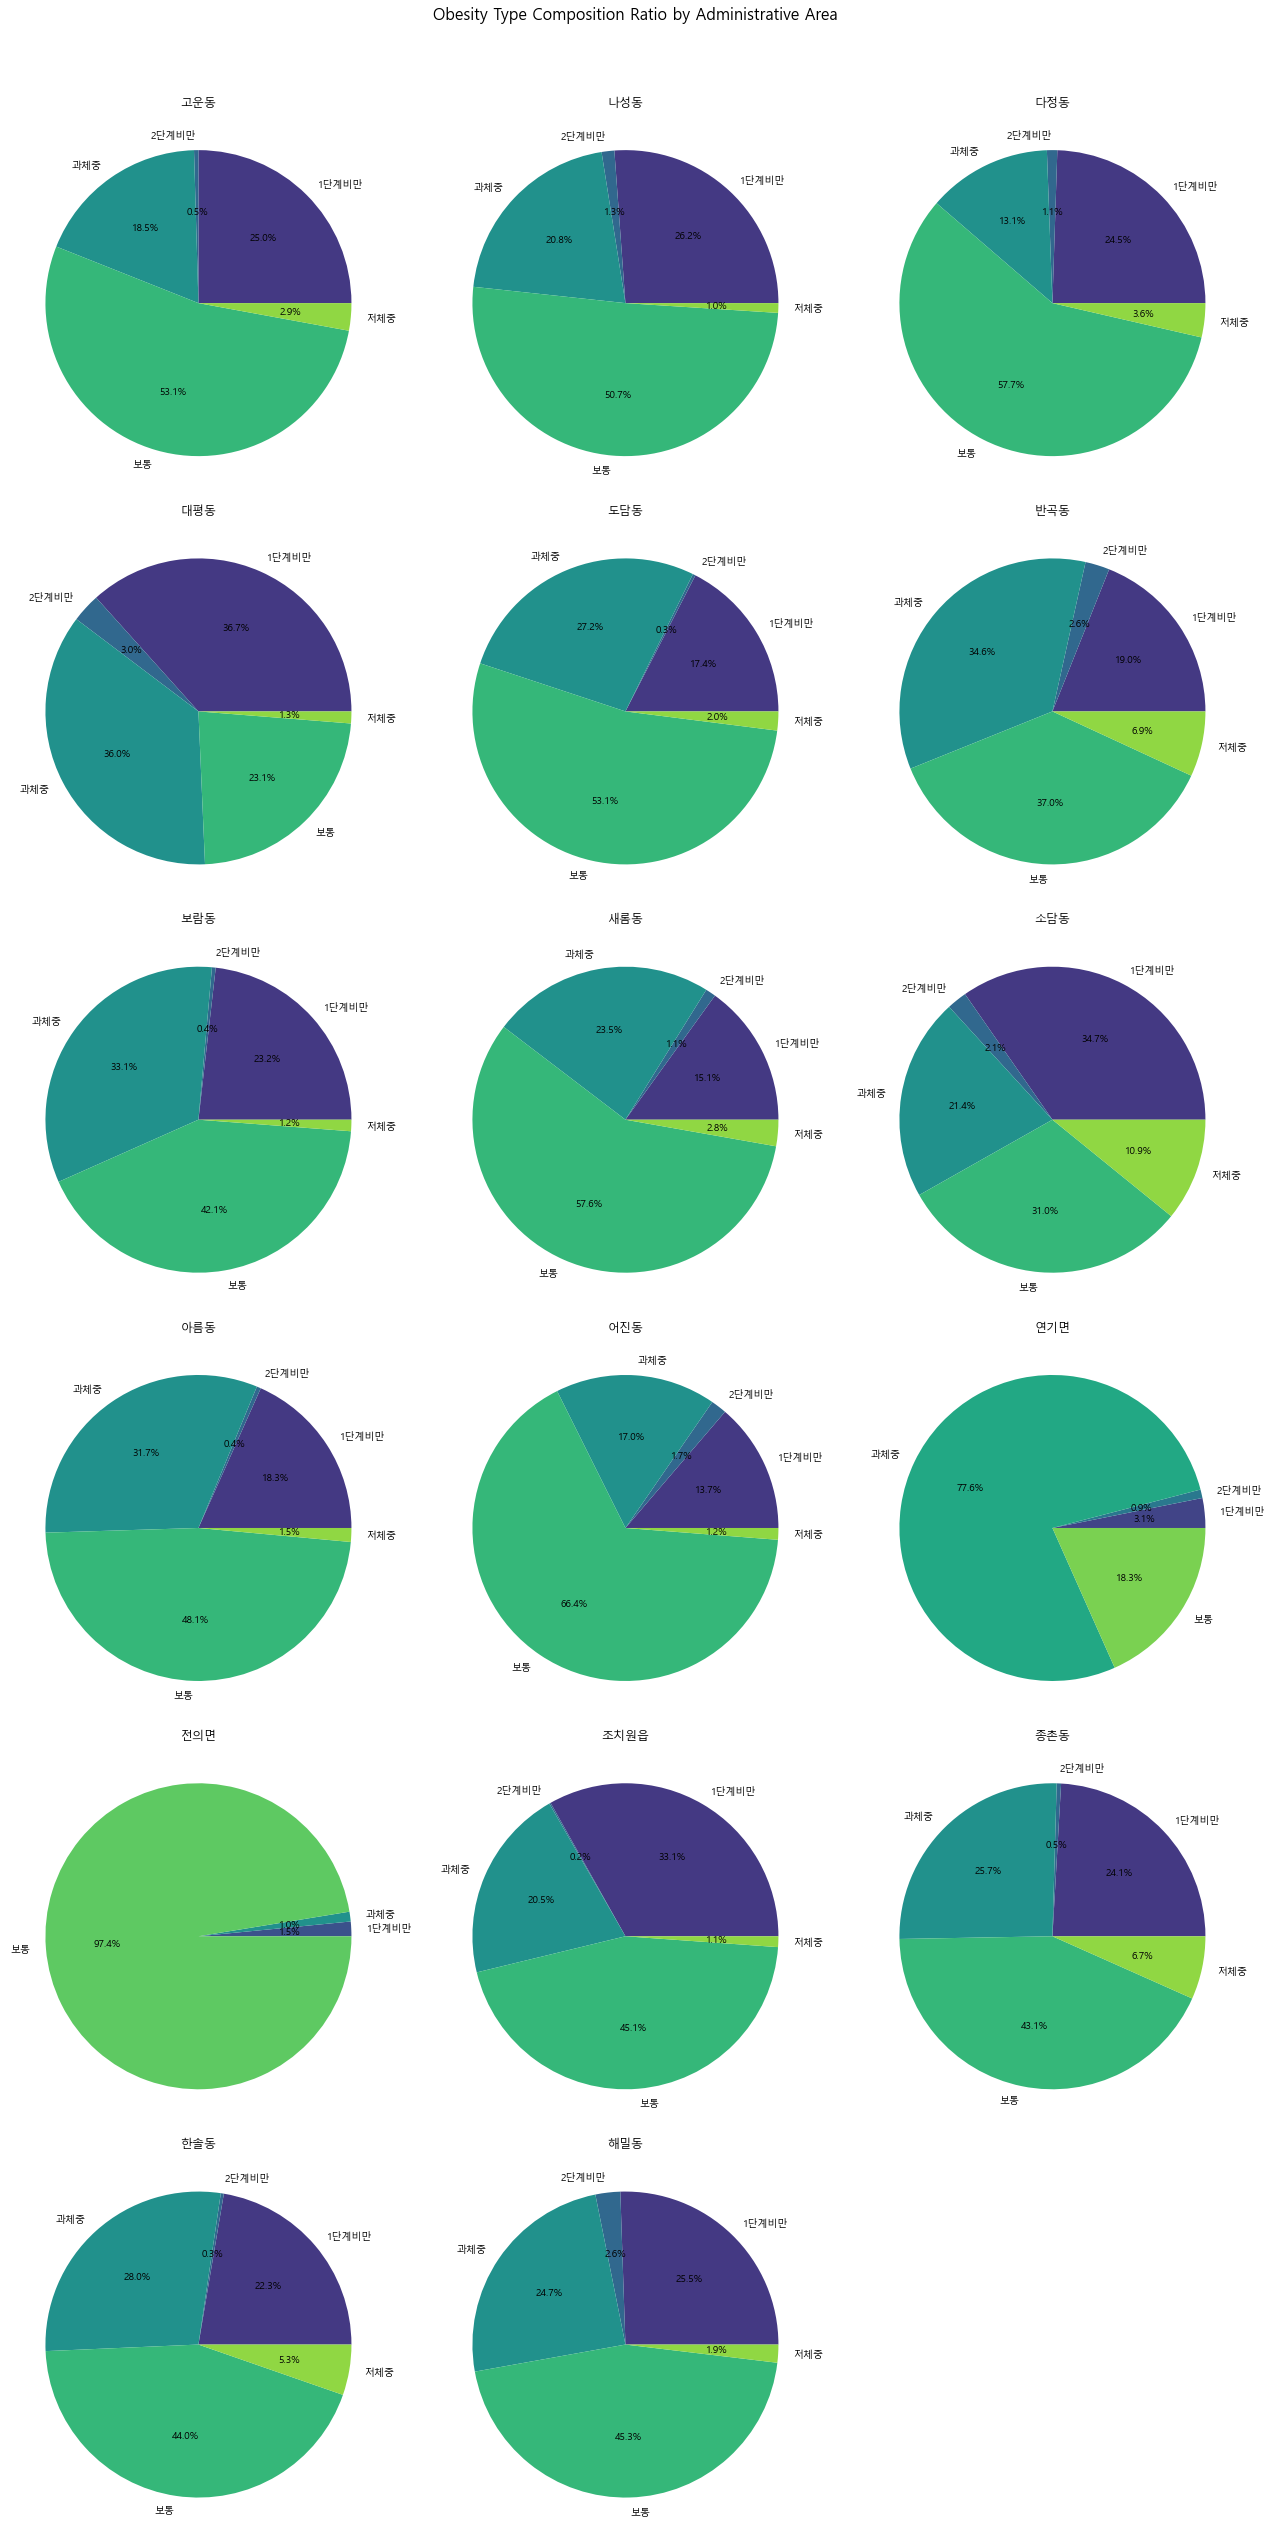

In [93]:
# 비만 유형별로 행정동별 구성 비율 계산
adf_wh_es_fat_per = adf_wh_es_fat.groupby(['행정동명', 'fat'])\
    .size()\
    .groupby(level=0)\
    .apply(lambda x: x / x.sum())\
    .reset_index(name='ratio')

# 행정동별 비만 유형 비율을 원형 그래프로 나타내기
unique_areas = adf_wh_es_fat_per['행정동명'].unique()
num_areas = len(unique_areas)

# 원형 그래프를 그릴 서브플롯 설정
fig, axes = plt.subplots(nrows=int(np.ceil(num_areas / 3)), ncols=3, figsize=(18, 6 * np.ceil(num_areas / 3)))
axes = axes.flatten()  # 서브플롯 배열을 1차원으로 변환

for ax, area in zip(axes, unique_areas):
    # 해당 행정동의 데이터 필터링
    data = adf_wh_es_fat_per[adf_wh_es_fat_per['행정동명'] == area]
    
    # 원형 그래프 그리기
    ax.pie(data['ratio'], labels=data['fat'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(data)))
    ax.set_title(area)

# 남은 서브플롯 숨기기 (행정동이 적을 경우)
for i in range(len(unique_areas), len(axes)):
    fig.delaxes(axes[i])

# 전체 제목 설정
plt.suptitle('Obesity Type Composition Ratio by Administrative Area', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 전체 제목과 서브플롯 간의 여백 조정
plt.show()

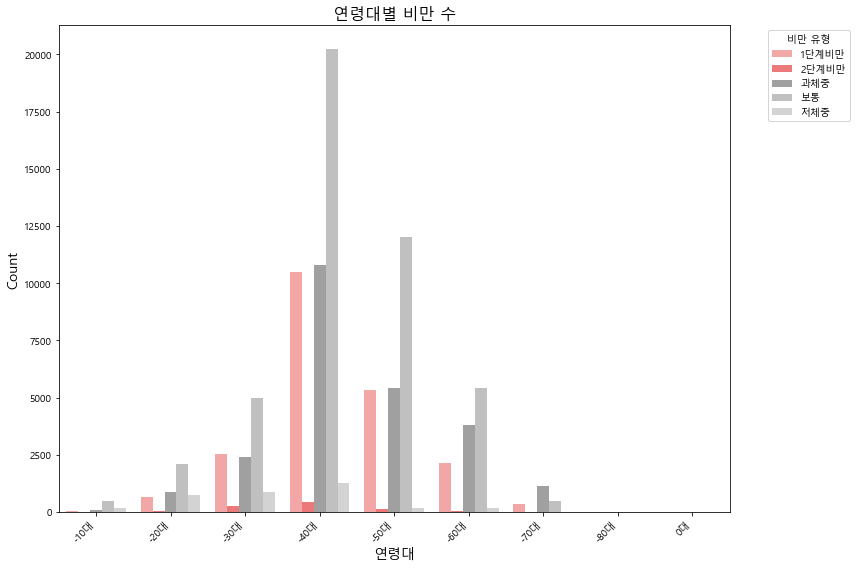

In [94]:
#연령대별 비만 수
# 연령대별로 그룹화
adf_wh_es_fat['연령대'] = (adf_wh_es_fat['나이'] // 10 * -10).astype(str) + '대'

# 연령대별 비만 유형 수 계산
adf_wh_es_age = adf_wh_es_fat.groupby(['연령대', 'fat'])\
    .size()\
    .reset_index(name='count')

# 시각화를 위한 색상 설정
palette = {
    '저체중': '#d3d3d3',  # Light grey
    '보통': '#c0c0c0',    # Grey
    '과체중': '#a0a0a0',  # Darker grey
    '1단계비만': '#ff9999',  # Light red
    '2단계비만': '#ff6666',  # Medium red
    '3단계비만': '#ff3333'   # Dark red
}

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(
    x='연령대', 
    y='count', 
    hue='fat', 
    data=adf_wh_es_age, 
    palette=palette
)

# 그래프 제목 및 축 레이블 설정
plt.title('연령대별 비만 수', fontsize=16)
plt.xlabel('연령대', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# 범례 설정
plt.legend(title='비만 유형', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()

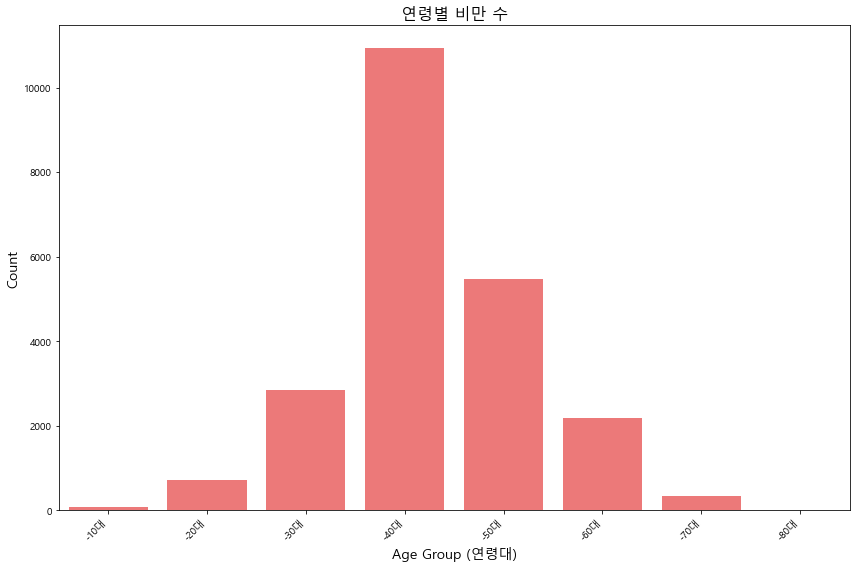

In [95]:
#adf_wh_es_fat[adf_wh_es_fat['fat'].isin(['1단계비만', '2단계비만', '3단계비만'])]

adf_wh_es_fat_age= adf_wh_es_fat[adf_wh_es_fat['fat'].isin(['1단계비만', '2단계비만', '3단계비만'])]\
    .groupby('연령대')\
    .size()\
    .reset_index(name='count')

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(
    x='연령대', 
    y='count', 
    data=adf_wh_es_fat_age, 
    color='#ff6666'  # 비만을 나타내는 색상
)

# 그래프 제목 및 축 레이블 설정
plt.title('연령별 비만 수', fontsize=16)
plt.xlabel('Age Group (연령대)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# 그래프 출력
plt.tight_layout()
plt.show()

In [96]:
## 이상치가 어디에 많은가
df_wh_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3268 entries, 28 to 100246
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사용자 고유번호  3268 non-null   object 
 1   측정일자      3268 non-null   object 
 2   측정시간      3268 non-null   object 
 3   성별        3268 non-null   object 
 4   사용자 출생년도  3268 non-null   int64  
 5   행정동명      3268 non-null   object 
 6   체중        3268 non-null   float64
 7   신장        2713 non-null   float64
 8   나이        3268 non-null   int64  
 9   bmi       0 non-null      float64
dtypes: float64(3), int64(2), object(5)
memory usage: 280.8+ KB


In [98]:
df_wh_outliers.value_counts('행정동명)
                            

SyntaxError: EOL while scanning string literal (Temp/ipykernel_11328/2694609531.py, line 1)

In [99]:
print(df_wh_outliers.value_counts('bmi'))

Series([], dtype: int64)


<AxesSubplot:xlabel='count', ylabel='행정동명'>

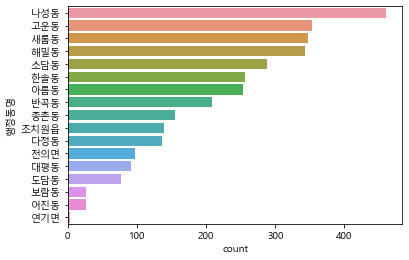

In [100]:
sns.countplot(data=df_wh_outliers, y='행정동명',order = df_wh_outliers['행정동명'].value_counts().index)

# 인바디 데이터 분석

In [101]:
adf_inbody_es.head()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,체중,총체수분,단백질,무기질,체지방량,근육량,제지방량,골격근량,체질량지수,체지방률,오른팔 근육량,왼팔 근육량,몸통 근육량,오른다리 근육량,왼다리 근육량,오른팔 체지방량,왼팔 체지방량,몸통 체지방량,오른다리 체지방량,왼다리 체지방량,인바디점수,적정체중,체중조절,지방조절,근육조절,기초대사량,복부지방률,내장지방레벨,비만도,골무기질량,복부둘레,나이,측정연도,측정요일,휴일구분,나이구분,방문시간
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:19,M,1994,나성동,76.2,37.8,10.4,3.7,24.3,48.8,51.9,29,26.8,32,2.57,2.60,22.3,8.6,8.63,1.7,1.6,11.9,4.0,4.0,64,62.5,-13.7,-14.9,1.2,1491,0.85,9,122,3.14,88.2,31,2021,Monday,평일,30,14
1,CAD4E5E5AE8D7CACE0535F00A8C075E0,2021-08-31,14:11,F,1983,종촌동,63.7,33.8,9.0,3.4,17.5,43.4,46.2,25,22.7,27,2.22,2.09,19.5,7.6,7.40,1.1,1.2,8.4,2.9,2.9,77,60.1,-3.6,-3.6,0.0,1369,0.82,6,108,2.80,78.7,42,2021,Tuesday,평일,40,14
2,CAD50BA68DA78C38E0535F00A8C01524,2021-08-31,14:20,F,1981,종촌동,41.9,24.3,6.4,2.2,9.0,31.1,32.9,18,17.8,22,1.51,1.46,14.9,5.1,5.04,0.6,0.6,3.8,1.6,1.6,72,49.5,7.6,2.4,5.2,1080,0.82,3,85,1.75,67.9,44,2021,Tuesday,평일,40,14
3,CAD71E638BAC342BE0535F00A8C05272,2021-08-31,16:51,M,1980,한솔동,84.0,47.2,13.7,4.6,18.5,61.7,65.5,39,NaN,22,3.62,3.51,28.4,11.5,11.43,0.9,0.9,9.0,3.3,3.2,88,77.1,-6.9,-6.9,0.0,1785,0.75,3,140,3.82,84.2,45,2021,Tuesday,평일,40,16
4,CAD72451510337B6E0535F00A8C02A56,2021-08-31,17:01,M,1952,한솔동,65.9,44.6,12.7,4.1,4.5,58.0,61.4,36,22.2,7,3.42,3.37,27.4,11.0,10.67,0.1,0.1,1.3,1.1,1.0,86,65.9,0.0,0.0,0.0,1696,0.73,1,101,3.37,69.2,73,2021,Tuesday,평일,70,17


In [102]:
adf_inbody_es.head()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,체중,총체수분,단백질,무기질,체지방량,근육량,제지방량,골격근량,체질량지수,체지방률,오른팔 근육량,왼팔 근육량,몸통 근육량,오른다리 근육량,왼다리 근육량,오른팔 체지방량,왼팔 체지방량,몸통 체지방량,오른다리 체지방량,왼다리 체지방량,인바디점수,적정체중,체중조절,지방조절,근육조절,기초대사량,복부지방률,내장지방레벨,비만도,골무기질량,복부둘레,나이,측정연도,측정요일,휴일구분,나이구분,방문시간
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:19,M,1994,나성동,76.2,37.8,10.4,3.7,24.3,48.8,51.9,29,26.8,32,2.57,2.60,22.3,8.6,8.63,1.7,1.6,11.9,4.0,4.0,64,62.5,-13.7,-14.9,1.2,1491,0.85,9,122,3.14,88.2,31,2021,Monday,평일,30,14
1,CAD4E5E5AE8D7CACE0535F00A8C075E0,2021-08-31,14:11,F,1983,종촌동,63.7,33.8,9.0,3.4,17.5,43.4,46.2,25,22.7,27,2.22,2.09,19.5,7.6,7.40,1.1,1.2,8.4,2.9,2.9,77,60.1,-3.6,-3.6,0.0,1369,0.82,6,108,2.80,78.7,42,2021,Tuesday,평일,40,14
2,CAD50BA68DA78C38E0535F00A8C01524,2021-08-31,14:20,F,1981,종촌동,41.9,24.3,6.4,2.2,9.0,31.1,32.9,18,17.8,22,1.51,1.46,14.9,5.1,5.04,0.6,0.6,3.8,1.6,1.6,72,49.5,7.6,2.4,5.2,1080,0.82,3,85,1.75,67.9,44,2021,Tuesday,평일,40,14
3,CAD71E638BAC342BE0535F00A8C05272,2021-08-31,16:51,M,1980,한솔동,84.0,47.2,13.7,4.6,18.5,61.7,65.5,39,NaN,22,3.62,3.51,28.4,11.5,11.43,0.9,0.9,9.0,3.3,3.2,88,77.1,-6.9,-6.9,0.0,1785,0.75,3,140,3.82,84.2,45,2021,Tuesday,평일,40,16
4,CAD72451510337B6E0535F00A8C02A56,2021-08-31,17:01,M,1952,한솔동,65.9,44.6,12.7,4.1,4.5,58.0,61.4,36,22.2,7,3.42,3.37,27.4,11.0,10.67,0.1,0.1,1.3,1.1,1.0,86,65.9,0.0,0.0,0.0,1696,0.73,1,101,3.37,69.2,73,2021,Tuesday,평일,70,17


In [103]:
#성별 이용
adf_inbody_es_sex=adf_inbody_es.value_counts('성별')

adf_inbody_es_sex

성별
F    12378
M     8348
dtype: int64

<AxesSubplot:xlabel='성별', ylabel='count'>

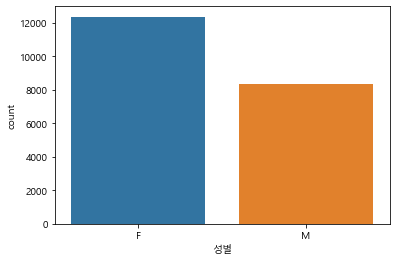

In [104]:
sns.countplot(data=adf_inbody_es,x='성별',order=['F','M'])

In [105]:
#동별 이용
adf_inbody_es.value_counts('행정동명')

행정동명
한솔동     3853
새롬동     3776
아름동     2358
다정동     1498
도담동     1496
고운동     1211
반곡동     1210
종촌동      941
해밀동      898
보람동      811
나성동      724
대평동      645
연기면      524
조치원읍     424
소담동      357
dtype: int64

<AxesSubplot:xlabel='count', ylabel='행정동명'>

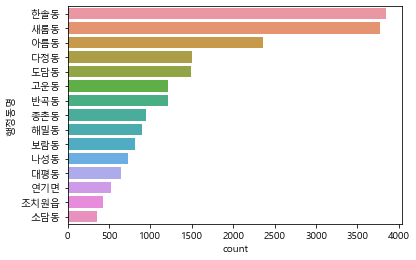

In [106]:
sns.countplot(data=adf_inbody_es,y='행정동명',order = adf_inbody_es['행정동명'].value_counts().index)

## 동별 , bmi지수 평균_인바디

In [107]:

'''       .agg(n=('bmi','mean'))\
sns.barplot(data=adf_wh_es_mean,x='n')
adf_wh_es_mean=adf_wh.groupby('행정동명')\
'''

adf_inbody_es_mean = adf_inbody_es.groupby('행정동명', as_index=False)\
    .agg(bmi_mean=('체질량지수', 'mean'))\
    .sort_values(by='bmi_mean', ascending=False)
'''
df.sort_values(by = 'A', ascending = False)
'''
# barplot 그리기
#sns.barplot(data=adf_wh_es_mean, x='행정동명', y='bmi_mean')

"\ndf.sort_values(by = 'A', ascending = False)\n"

In [108]:
adf_inbody_es_mean

,행정동명,bmi_mean
8,소담동,24.778246
6,보람동,24.577114
3,대평동,23.592271
10,연기면,23.475191
12,종촌동,23.367964
0,고운동,23.269337
11,조치원읍,23.209398
14,해밀동,23.179118
1,나성동,23.028959
5,반곡동,23.016710


<AxesSubplot:xlabel='행정동명', ylabel='bmi_mean'>

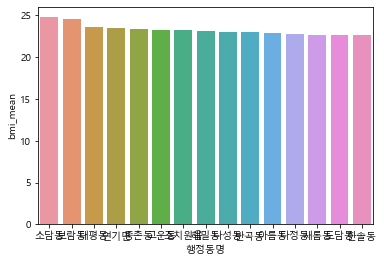

In [109]:
# barplot 그리기
sns.barplot(data=adf_inbody_es_mean, x='행정동명', y='bmi_mean')

<AxesSubplot:xlabel='bmi_mean', ylabel='행정동명'>

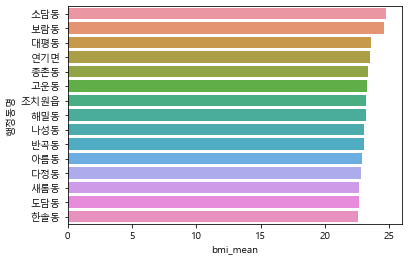

In [110]:
# barplot 그리기
sns.barplot(data=adf_inbody_es_mean, y='행정동명',x='bmi_mean')

In [111]:
adf_inbody_es_fat=adf_inbody_es.copy()
adf_inbody_es_fat['fat']=np.where(adf_inbody_es_fat['체질량지수']<=18.5,'저체중',
                    np.where(adf_inbody_es_fat['체질량지수']<=22.9,'보통',
                    np.where(adf_inbody_es_fat['체질량지수']<=24.9,'과체중',
                    np.where(adf_inbody_es_fat['체질량지수']<=29.9,'1단계비만',
                    np.where(adf_inbody_es_fat['체질량지수']<=34.9,'2단계비만','3단계비만')))))

In [112]:
#비만 유형벌 count
adf_inbody_es_fat[['행정동명','fat']].value_counts('fat')



fat
보통       9772
과체중      5646
1단계비만    4025
저체중       678
3단계비만     581
2단계비만      24
dtype: int64

## 동별 비만인 사람 수_인바디


In [113]:
adf_inbody_es_fat

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,체중,총체수분,단백질,무기질,체지방량,근육량,제지방량,골격근량,체질량지수,체지방률,오른팔 근육량,왼팔 근육량,몸통 근육량,오른다리 근육량,왼다리 근육량,오른팔 체지방량,왼팔 체지방량,몸통 체지방량,오른다리 체지방량,왼다리 체지방량,인바디점수,적정체중,체중조절,지방조절,근육조절,기초대사량,복부지방률,내장지방레벨,비만도,골무기질량,복부둘레,나이,측정연도,측정요일,휴일구분,나이구분,방문시간,fat
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:19,M,1994,나성동,76.2,37.8,10.4,3.7,24.3,48.8,51.9,29,26.8,32,2.57,2.60,22.3,8.6,8.63,1.7,1.6,11.9,4.0,4.0,64,62.5,-13.7,-14.9,1.2,1491,0.85,9,122,3.14,88.2,31,2021,Monday,평일,30,14,1단계비만
1,CAD4E5E5AE8D7CACE0535F00A8C075E0,2021-08-31,14:11,F,1983,종촌동,63.7,33.8,9.0,3.4,17.5,43.4,46.2,25,22.7,27,2.22,2.09,19.5,7.6,7.40,1.1,1.2,8.4,2.9,2.9,77,60.1,-3.6,-3.6,0.0,1369,0.82,6,108,2.80,78.7,42,2021,Tuesday,평일,40,14,보통
2,CAD50BA68DA78C38E0535F00A8C01524,2021-08-31,14:20,F,1981,종촌동,41.9,24.3,6.4,2.2,9.0,31.1,32.9,18,17.8,22,1.51,1.46,14.9,5.1,5.04,0.6,0.6,3.8,1.6,1.6,72,49.5,7.6,2.4,5.2,1080,0.82,3,85,1.75,67.9,44,2021,Tuesday,평일,40,14,저체중
3,CAD71E638BAC342BE0535F00A8C05272,2021-08-31,16:51,M,1980,한솔동,84.0,47.2,13.7,4.6,18.5,61.7,65.5,39,NaN,22,3.62,3.51,28.4,11.5,11.43,0.9,0.9,9.0,3.3,3.2,88,77.1,-6.9,-6.9,0.0,1785,0.75,3,140,3.82,84.2,45,2021,Tuesday,평일,40,16,3단계비만
4,CAD72451510337B6E0535F00A8C02A56,2021-08-31,17:01,M,1952,한솔동,65.9,44.6,12.7,4.1,4.5,58.0,61.4,36,22.2,7,3.42,3.37,27.4,11.0,10.67,0.1,0.1,1.3,1.1,1.0,86,65.9,0.0,0.0,0.0,1696,0.73,1,101,3.37,69.2,73,2021,Tuesday,평일,70,17,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21115,DB1ADB27FA4AAB69E0535F00A8C0490E,2023-12-31,16:55,M,1964,한솔동,81.0,42.5,11.4,4.0,23.1,54.6,57.9,32,26.7,29,3.30,3.23,26.1,9.1,9.16,1.5,1.5,12.4,3.3,3.3,68,68.1,-12.9,-12.9,0.0,1620,0.94,10,121,3.27,95.8,61,2023,Sunday,주말,60,16,1단계비만
21116,F4CFC4CC099E3653E0535F00A8C047B0,2023-12-31,16:59,M,2012,한솔동,44.5,22.2,5.9,2.1,14.3,28.4,30.2,16,19.3,32,1.22,1.19,13.4,4.8,4.74,1.0,1.0,6.4,2.5,2.5,64,45.8,1.3,-7.4,8.7,1023,0.80,6,97,1.75,68.7,13,2023,Sunday,주말,10,16,보통
21117,ECA042D074BC3C3DE0535F00A8C03CE8,2023-12-31,17:08,F,1978,아름동,65.1,35.9,9.6,3.3,16.3,46.0,48.8,27,25.2,25,2.58,2.53,21.3,7.5,7.43,0.9,1.0,8.1,2.6,2.6,85,63.4,-1.7,-1.7,0.0,1425,0.82,6,120,2.77,79.7,47,2023,Sunday,주말,40,17,1단계비만
21118,FC704619FFF0D53EE0535F00A8C02ED7,2023-12-31,17:13,F,2015,한솔동,39.1,19.1,5.1,1.9,13.0,24.6,26.1,13,21.4,33,1.04,0.99,11.1,3.7,3.69,0.9,0.9,5.6,2.4,2.4,72,32.0,-7.1,-7.3,0.2,933,0.73,5,122,1.53,62.8,10,2023,Sunday,주말,10,17,보통


In [114]:
#동별 비만인 사람 수_신장체중
adf_inbody_es_fat_cnt = adf_inbody_es_fat[adf_inbody_es_fat['fat'].isin(['1단계비만', '2단계비만', '3단계비만'])]\
    .groupby('행정동명', as_index=False)\
    .size()\
    .sort_values('size',ascending=False)
adf_inbody_es_fat_cnt

,행정동명,size
13,한솔동,716
7,새롬동,586
9,아름동,441
0,고운동,416
6,보람동,399
2,다정동,363
5,반곡동,307
14,해밀동,267
12,종촌동,266
4,도담동,257


In [141]:
adf_inbody_es_fat_cnt.to_csv('inbody_cnt.csv',index=False)

<AxesSubplot:xlabel='size', ylabel='행정동명'>

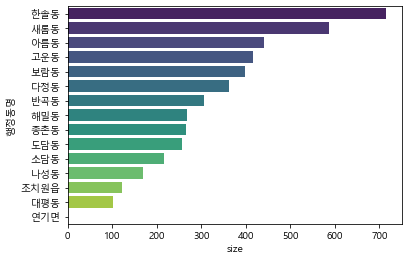

In [115]:
sns.barplot(y='행정동명', x='size', data=adf_inbody_es_fat_cnt, palette='viridis')



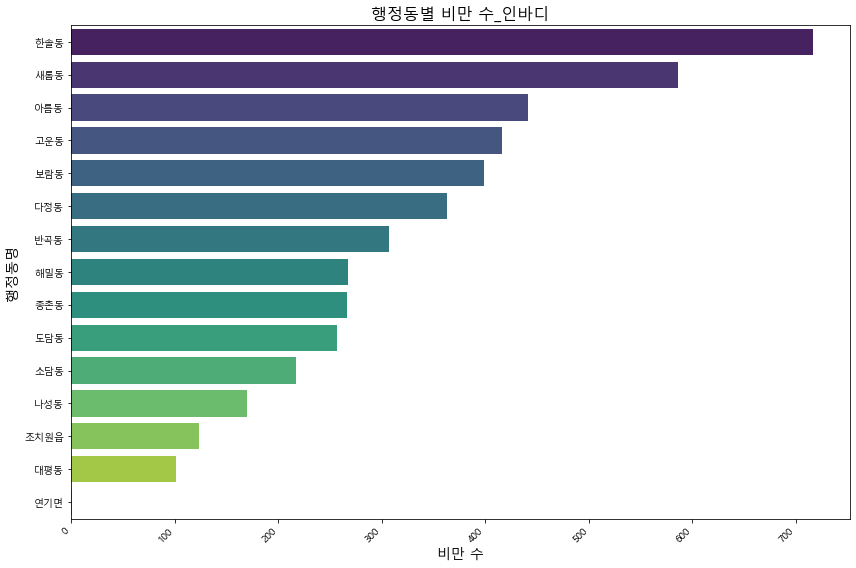

In [116]:
plt.figure(figsize=(12, 8))
sns.barplot(y='행정동명',x='size', data=adf_inbody_es_fat_cnt, palette='viridis')

# 그래프 제목 및 축 레이블 설정
plt.title('행정동별 비만 수_인바디', fontsize=16)
plt.xlabel('비만 수', fontsize=14)
plt.ylabel('행정동명', fontsize=14)

# x축 레이블 회전 (가독성 향상)
plt.xticks(rotation=45, ha='right')

# 그래프 출력
plt.tight_layout()
plt.show()

## 행정동별 비만 비율

<AxesSubplot:xlabel='obesity_rate', ylabel='행정동명'>

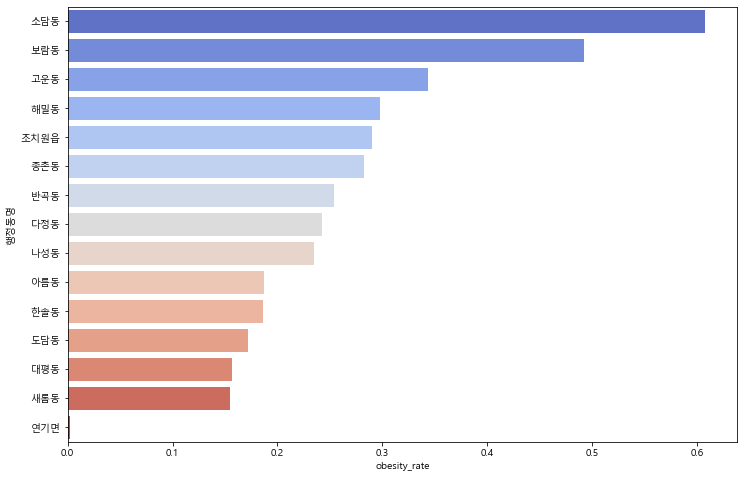

In [117]:

# 행정동별 전체 인구 수 계산
adf_inbody_es_pop = adf_inbody_es_fat.groupby('행정동명', as_index=False).size()

# 비만 비율 계산 (비만인 사람 수 / 전체 인구 수)
adf_inbody_es_fat_cnt['obesity_rate'] = adf_inbody_es_fat_cnt['size'] / adf_inbody_es_pop['size']
adf_inbody_es_fat_cnt= adf_inbody_es_fat_cnt.sort_values(by='obesity_rate', ascending=False)

# 행정동명을 기준으로 비만 비율을 barplot으로 그리기
plt.figure(figsize=(12, 8))
sns.barplot(y='행정동명',x='obesity_rate', data=adf_inbody_es_fat_cnt, palette='coolwarm')


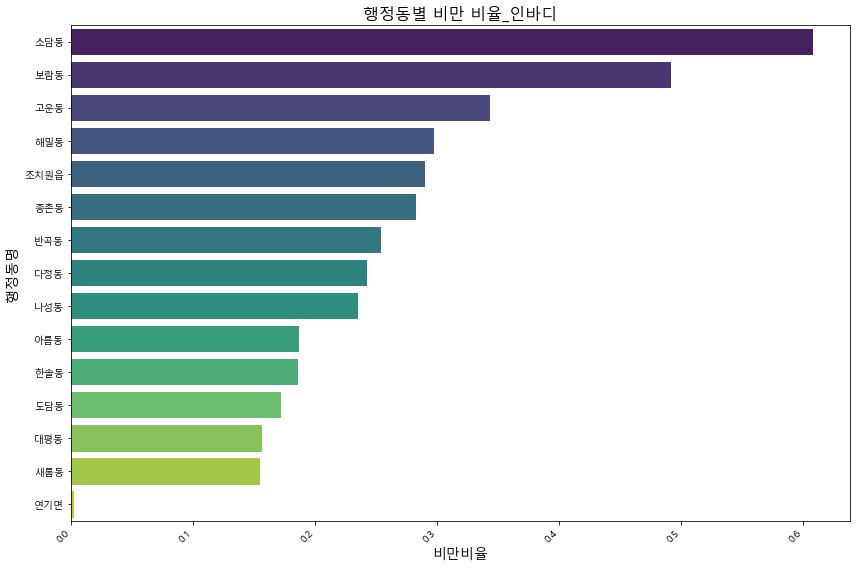

In [118]:
plt.figure(figsize=(12, 8))
sns.barplot(y='행정동명',x='obesity_rate', data=adf_inbody_es_fat_cnt, palette='viridis')

# 그래프 제목 및 축 레이블 설정
plt.title('행정동별 비만 비율_인바디', fontsize=16)
plt.xlabel('비만비율', fontsize=14)
plt.ylabel('행정동명', fontsize=14)


# x축 레이블 회전 (가독성 향상)
plt.xticks(rotation=45, ha='right')

# 그래프 출력
plt.tight_layout()
plt.show()

In [119]:
#성별 비만 

In [120]:
#나이대별 비만

In [121]:
#동별 비만과 관련된 병원/ 헬스장 존재 유무



In [122]:
#동별 , bmi지수 평균

In [123]:
#동별 ,인바디 bmi 지수 평균

In [124]:
adf_wh.head()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,체중,신장,나이,bmi,측정연도,측정요일,휴일구분,나이구분,방문시간
0,CA4C04225E405C30E0535F00A8C03ECD,2021-08-24,18:47,F,1995,다정동,72.5,166.0,30,26.31,2021,Tuesday,평일,30,18
1,CA4C255510F09F7CE0535F00A8C009F2,2021-08-24,18:56,F,1971,해밀동,57.3,163.0,54,21.57,2021,Tuesday,평일,50,18
2,CA4CD6CDEB87EAF5E0535F00A8C081B0,2021-08-24,19:45,M,1979,새롬동,58.0,166.0,46,21.05,2021,Tuesday,평일,40,19
3,CA5E614540CE0769E0535F00A8C08588,2021-08-25,16:41,M,1994,나성동,74.0,170.0,31,25.61,2021,Wednesday,평일,30,16
4,CA71A06B1801D4FBE0535F00A8C05802,2021-08-26,15:39,M,1984,반곡동,93.5,187.0,41,26.74,2021,Thursday,평일,40,15


In [125]:
#비교


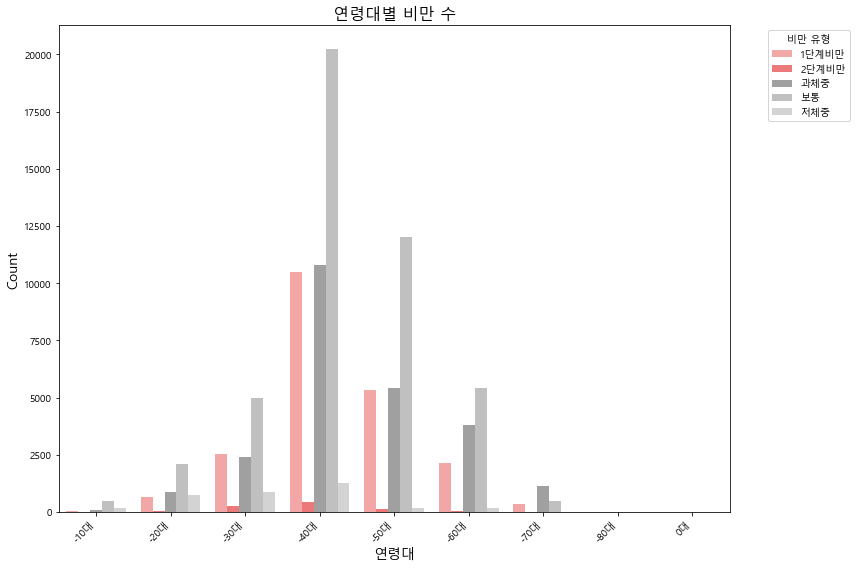

In [126]:
#연령대별 비만 수
# 연령대별로 그룹화
adf_wh_es_fat['연령대'] = (adf_wh_es_fat['나이'] // 10 * -10).astype(str) + '대'

# 연령대별 비만 유형 수 계산
adf_wh_es_age = adf_wh_es_fat.groupby(['연령대', 'fat'])\
    .size()\
    .reset_index(name='count')

# 시각화를 위한 색상 설정
palette = {
    '저체중': '#d3d3d3',  # Light grey
    '보통': '#c0c0c0',    # Grey
    '과체중': '#a0a0a0',  # Darker grey
    '1단계비만': '#ff9999',  # Light red
    '2단계비만': '#ff6666',  # Medium red
    '3단계비만': '#ff3333'   # Dark red
}

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(
    x='연령대', 
    y='count', 
    hue='fat', 
    data=adf_wh_es_age, 
    palette=palette
)

# 그래프 제목 및 축 레이블 설정
plt.title('연령대별 비만 수', fontsize=16)
plt.xlabel('연령대', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# 범례 설정
plt.legend(title='비만 유형', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()

In [127]:
#adf_wh_es_fat[adf_wh_es_fat['fat'].isin(['1단계비만', '2단계비만', '3단계비만'])]

adf_inbody_es_fat= adf_inbody_es_fat[adf_wh_es_fat['fat'].isin(['1단계비만', '2단계비만', '3단계비만'])]\
    .groupby('연령대')\
    .size()\
    .reset_index(name='count')

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(
    x='연령대', 
    y='count', 
    data=adf_inbody_es_fat, 
    color='#ff6666'  # 비만을 나타내는 색상
)

# 그래프 제목 및 축 레이블 설정
plt.title('연령별 비만 수', fontsize=16)
plt.xlabel('Age Group (연령대)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# 그래프 출력
plt.tight_layout()
plt.show()

C:\Users\82104\AppData\Local\Temp/ipykernel_11328/2711718392.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  adf_inbody_es_fat= adf_inbody_es_fat[adf_wh_es_fat['fat'].isin(['1단계비만', '2단계비만', '3단계비만'])]\


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [128]:
## 이상치가 어디에 많은가
df_wh_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3268 entries, 28 to 100246
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사용자 고유번호  3268 non-null   object 
 1   측정일자      3268 non-null   object 
 2   측정시간      3268 non-null   object 
 3   성별        3268 non-null   object 
 4   사용자 출생년도  3268 non-null   int64  
 5   행정동명      3268 non-null   object 
 6   체중        3268 non-null   float64
 7   신장        2713 non-null   float64
 8   나이        3268 non-null   int64  
 9   bmi       0 non-null      float64
dtypes: float64(3), int64(2), object(5)
memory usage: 409.9+ KB


In [129]:
df_wh_outliers.value_counts('행정동명)
                            

SyntaxError: EOL while scanning string literal (Temp/ipykernel_11328/2694609531.py, line 1)

In [130]:
print(df_wh_outliers.value_counts('bmi'))

Series([], dtype: int64)


<AxesSubplot:xlabel='count', ylabel='행정동명'>

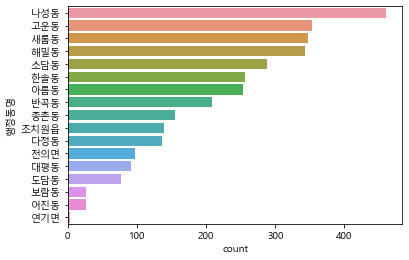

In [131]:
sns.countplot(data=df_wh_outliers, y='행정동명',order = df_wh_outliers['행정동명'].value_counts().index)

In [135]:
a25

15.700000000000005

In [137]:
import numpy as np

In [138]:
df_inbody_outlier_2=np.query(df_inbody['체질량지수']<=a25|df_inbody['체질량지수']>=a75)

AttributeError: module 'numpy' has no attribute 'query'

In [ ]:
- 혈압/비만은 이상치제거 시 해당 내역을 별도 DataFrame으로 만들어 둘것 (분석시 활용하지 않으나, 추후 연계분석 시 중증환자군으로 유의미 부여 필요)